In [1]:
# Step 1: Load and inspect the training dataset

import pandas as pd

# Load the CSV file
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")

# Display basic info
print("Shape of the dataset:", train_df.shape)
print("\nColumn names:")
print(train_df.columns.tolist())

print("\nData types and non-null counts:")
print(train_df.info())

print("\nFirst 5 rows:")
print(train_df.head())

print("\nSummary statistics for numerical features:")
print(train_df.describe())

print("\nLabel distribution:")
print(train_df['Label'].value_counts())


Shape of the dataset: (477, 198)

Column names:
['Label', 'SMILES', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHete

DATA QUALITY CHECK

Missing values per column:
No missing values found!

Duplicate rows: 0

Zero variance features:
Found 17 zero variance features
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7'] ...

CLASS DISTRIBUTION ANALYSIS

Class distribution:
Label
0    359
1    118
Name: count, dtype: int64

Class balance ratio: 3.04:1 (Negative:Positive)
Positive class percentage: 24.74%


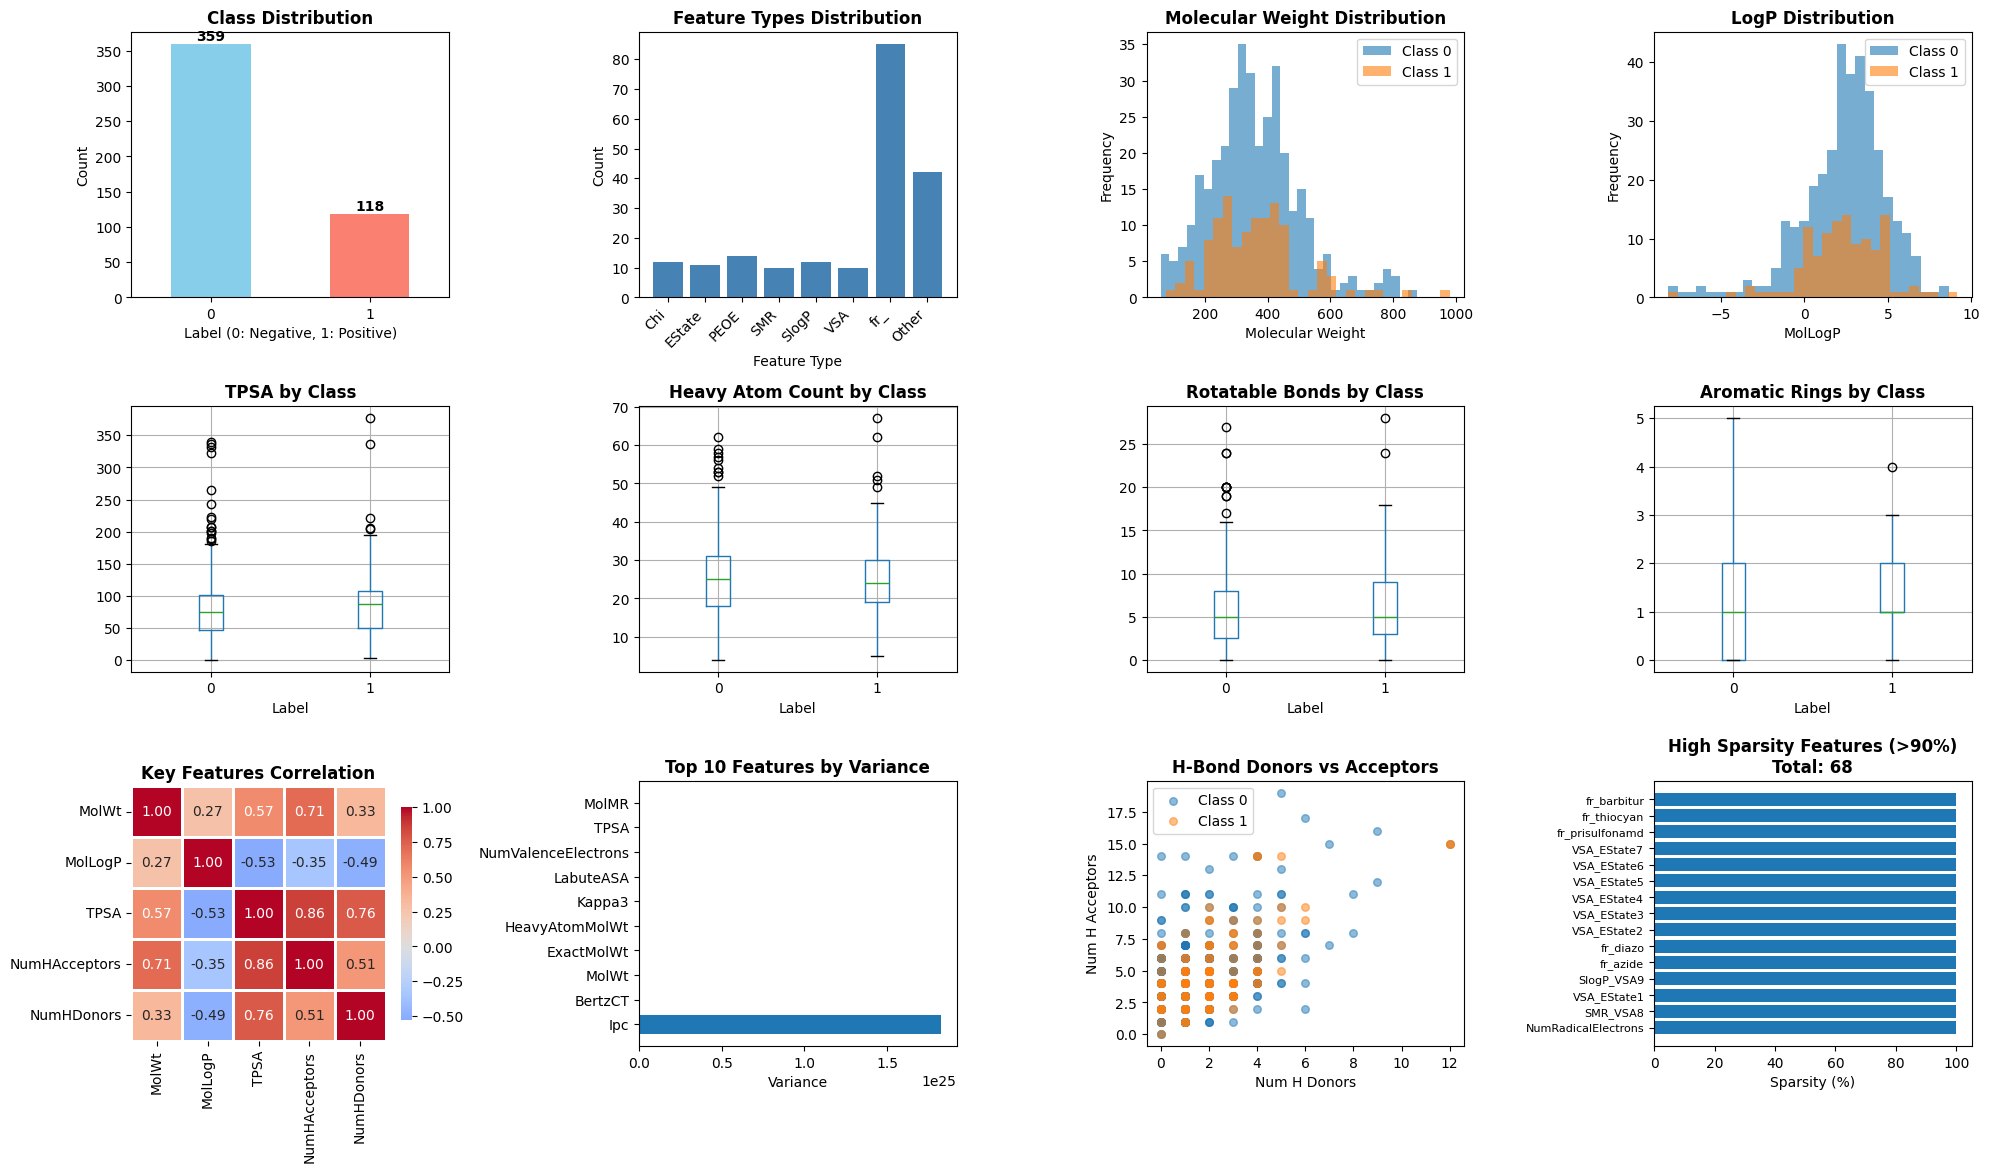

FEATURE STATISTICS

Total features: 196
Zero variance features: 17
High sparsity features (>90% zeros): 68
Low variance features (var < 0.01): 27

KEY MOLECULAR PROPERTIES COMPARISON

          Property  Class_0_Mean  Class_1_Mean  Difference  P_Value Significant
            MolWt    359.105850    360.593585    1.487735 0.923216          No
          MolLogP      2.354772      2.278907   -0.075865 0.777586          No
             TPSA     83.227967     90.634153    7.406186 0.201353          No
    NumHAcceptors      4.891365      5.000000    0.108635 0.733833          No
       NumHDonors      1.852368      2.203390    0.351022 0.061564          No
NumRotatableBonds      5.732591      6.322034    0.589443 0.224167          No
 NumAromaticRings      1.387187      1.483051    0.095864 0.428984          No
   HeavyAtomCount     24.849582     25.296610    0.447028 0.677231          No

NEXT STEPS RECOMMENDATION

1. Remove zero variance features
2. Consider removing high sparsity features

In [2]:
# Step 2: Data Exploration and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")

# Separate features and target
X = train_df.drop(['Label', 'SMILES'], axis=1)
y = train_df['Label']

print("DATA QUALITY CHECK")

# Check for missing values
print("\nMissing values per column:")
missing = train_df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

# Check for duplicate rows
print(f"\nDuplicate rows: {train_df.duplicated().sum()}")

# Check for zero variance features
print("\nZero variance features:")
zero_var = X.columns[X.var() == 0]
print(f"Found {len(zero_var)} zero variance features")
if len(zero_var) > 0:
    print(zero_var.tolist()[:10], "..." if len(zero_var) > 10 else "")

print("\nCLASS DISTRIBUTION ANALYSIS")

# Detailed class distribution
print("\nClass distribution:")
print(y.value_counts())
print(f"\nClass balance ratio: {y.value_counts()[0]/y.value_counts()[1]:.2f}:1 (Negative:Positive)")
print(f"Positive class percentage: {(y.sum()/len(y))*100:.2f}%")

# Visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Class distribution
plt.subplot(3, 4, 1)
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Label (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(y.value_counts()):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Distribution of number of features by molecular descriptor type
plt.subplot(3, 4, 2)
feature_types = {
    'Chi': [col for col in X.columns if col.startswith('Chi')],
    'EState': [col for col in X.columns if col.startswith('EState')],
    'PEOE': [col for col in X.columns if col.startswith('PEOE')],
    'SMR': [col for col in X.columns if col.startswith('SMR')],
    'SlogP': [col for col in X.columns if col.startswith('SlogP')],
    'VSA': [col for col in X.columns if col.startswith('VSA')],
    'fr_': [col for col in X.columns if col.startswith('fr_')],
    'Other': [col for col in X.columns if not any(col.startswith(p) for p in ['Chi', 'EState', 'PEOE', 'SMR', 'SlogP', 'VSA', 'fr_'])]
}
type_counts = {k: len(v) for k, v in feature_types.items()}
plt.bar(type_counts.keys(), type_counts.values(), color='steelblue')
plt.title('Feature Types Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# 3. Distribution of molecular weight by class
plt.subplot(3, 4, 3)
for label in [0, 1]:
    plt.hist(train_df[train_df['Label']==label]['MolWt'], alpha=0.6, 
             label=f'Class {label}', bins=30)
plt.title('Molecular Weight Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')
plt.legend()

# 4. Distribution of LogP by class
plt.subplot(3, 4, 4)
for label in [0, 1]:
    plt.hist(train_df[train_df['Label']==label]['MolLogP'], alpha=0.6, 
             label=f'Class {label}', bins=30)
plt.title('LogP Distribution', fontsize=12, fontweight='bold')
plt.xlabel('MolLogP')
plt.ylabel('Frequency')
plt.legend()

# 5. Box plot: TPSA by class
plt.subplot(3, 4, 5)
train_df.boxplot(column='TPSA', by='Label', ax=plt.gca())
plt.title('TPSA by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 6. Box plot: HeavyAtomCount by class
plt.subplot(3, 4, 6)
train_df.boxplot(column='HeavyAtomCount', by='Label', ax=plt.gca())
plt.title('Heavy Atom Count by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 7. Box plot: NumRotatableBonds by class
plt.subplot(3, 4, 7)
train_df.boxplot(column='NumRotatableBonds', by='Label', ax=plt.gca())
plt.title('Rotatable Bonds by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 8. Box plot: NumAromaticRings by class
plt.subplot(3, 4, 8)
train_df.boxplot(column='NumAromaticRings', by='Label', ax=plt.gca())
plt.title('Aromatic Rings by Class', fontsize=12, fontweight='bold')
plt.suptitle('')
plt.xlabel('Label')

# 9. Correlation between key features
plt.subplot(3, 4, 9)
key_features = ['MolWt', 'MolLogP', 'TPSA', 'NumHAcceptors', 'NumHDonors']
corr = train_df[key_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Key Features Correlation', fontsize=12, fontweight='bold')

# 10. Feature value ranges (top 10 features by variance)
plt.subplot(3, 4, 10)
top_var_features = X.var().nlargest(10)
plt.barh(range(len(top_var_features)), top_var_features.values)
plt.yticks(range(len(top_var_features)), top_var_features.index)
plt.xlabel('Variance')
plt.title('Top 10 Features by Variance', fontsize=12, fontweight='bold')
plt.tight_layout()

# 11. Number of hydrogen bond donors/acceptors
plt.subplot(3, 4, 11)
plt.scatter(train_df[train_df['Label']==0]['NumHDonors'], 
           train_df[train_df['Label']==0]['NumHAcceptors'], 
           alpha=0.5, label='Class 0', s=30)
plt.scatter(train_df[train_df['Label']==1]['NumHDonors'], 
           train_df[train_df['Label']==1]['NumHAcceptors'], 
           alpha=0.5, label='Class 1', s=30)
plt.xlabel('Num H Donors')
plt.ylabel('Num H Acceptors')
plt.title('H-Bond Donors vs Acceptors', fontsize=12, fontweight='bold')
plt.legend()

# 12. Sparsity analysis
plt.subplot(3, 4, 12)
sparsity = (X == 0).sum() / len(X) * 100
high_sparsity = sparsity[sparsity > 90].sort_values(ascending=False)
if len(high_sparsity) > 15:
    high_sparsity = high_sparsity[:15]
plt.barh(range(len(high_sparsity)), high_sparsity.values)
plt.yticks(range(len(high_sparsity)), high_sparsity.index, fontsize=8)
plt.xlabel('Sparsity (%)')
plt.title(f'High Sparsity Features (>90%)\nTotal: {len(sparsity[sparsity > 90])}', 
          fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('dia_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

print("FEATURE STATISTICS")
print(f"\nTotal features: {len(X.columns)}")
print(f"Zero variance features: {len(zero_var)}")
print(f"High sparsity features (>90% zeros): {len(sparsity[sparsity > 90])}")
print(f"Low variance features (var < 0.01): {len(X.var()[X.var() < 0.01])}")

print("\nKEY MOLECULAR PROPERTIES COMPARISON")

# Statistical comparison between classes
key_properties = ['MolWt', 'MolLogP', 'TPSA', 'NumHAcceptors', 'NumHDonors', 
                  'NumRotatableBonds', 'NumAromaticRings', 'HeavyAtomCount']

comparison_df = pd.DataFrame()
for prop in key_properties:
    class_0 = train_df[train_df['Label']==0][prop]
    class_1 = train_df[train_df['Label']==1][prop]
    t_stat, p_value = stats.ttest_ind(class_0, class_1)
    comparison_df = pd.concat([comparison_df, pd.DataFrame({
        'Property': [prop],
        'Class_0_Mean': [class_0.mean()],
        'Class_1_Mean': [class_1.mean()],
        'Difference': [class_1.mean() - class_0.mean()],
        'P_Value': [p_value],
        'Significant': ['Yes' if p_value < 0.05 else 'No']
    })], ignore_index=True)

print("\n", comparison_df.to_string(index=False))

print("\nNEXT STEPS RECOMMENDATION")
print("\n1. Remove zero variance features")
print("2. Consider removing high sparsity features (>95% zeros)")
print("3. Handle class imbalance (use SMOTE or class weights)")
print("4. Scale/normalize features")
print("5. Perform feature selection")
print("6. Check for multicollinearity")

# Save summary to file
with open('exploration_summary.txt', 'w') as f:
    f.write("DIA DATASET EXPLORATION SUMMARY\n")
    f.write(f"Total samples: {len(train_df)}\n")
    f.write(f"Total features: {len(X.columns)}\n")
    f.write(f"Class 0 (Negative): {(y==0).sum()}\n")
    f.write(f"Class 1 (Positive): {(y==1).sum()}\n")
    f.write(f"Imbalance ratio: {(y==0).sum()/(y==1).sum():.2f}:1\n\n")
    f.write(f"Zero variance features: {len(zero_var)}\n")
    f.write(f"High sparsity features: {len(sparsity[sparsity > 90])}\n")

print("\nExploration complete! Files saved:")
print("- dia_exploration.png")
print("- exploration_summary.txt")


INITIAL DATA PREPARATION

Training set: (477, 198)
Test set: (120, 198)

STEP 1: REMOVE ZERO/LOW VARIANCE FEATURES

Zero variance features removed: 17
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'VSA_EState1', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7'] ...
Low variance features removed (var < 0.01): 10

Features after variance filtering: 169

STEP 2: HANDLE HIGH SPARSITY FEATURES

Features with >95% sparsity: 32

Top 10 sparsest features:
fr_aldehyde           99.371069
fr_N_O                98.951782
fr_SH                 98.951782
fr_benzodiazepine     98.951782
fr_epoxide            98.951782
fr_morpholine         98.951782
fr_oxime              98.951782
fr_dihydropyridine    98.742138
fr_alkyl_carbamate    98.742138
fr_phos_ester         98.742138
dtype: float64

Features after sparsity filtering: 137

STEP 3: HANDLE MULTICOLLINEARITY

Highly correlated features (>0.95): 29
['Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', '

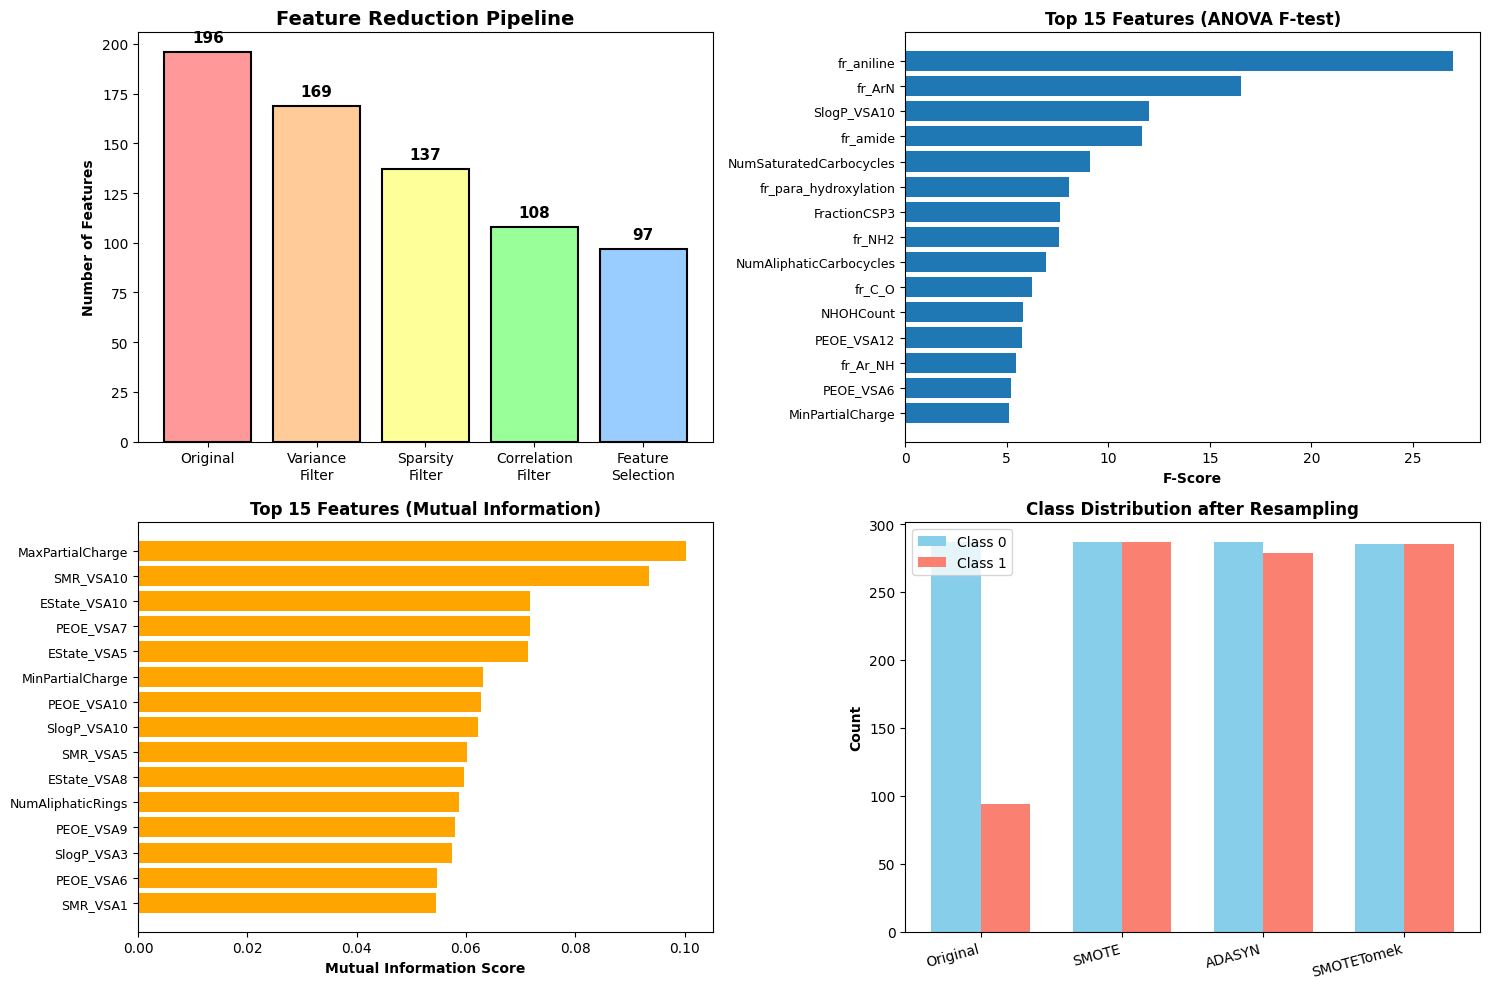


Visualization saved: preprocessing_summary.png


In [3]:
# Step 3: Data Preprocessing and Feature Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

# Load the data
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")
test_df = pd.read_csv("DIA_testset_RDKit_descriptors.csv")

print("INITIAL DATA PREPARATION")
print(f"\nTraining set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

# Separate features and target
X_train_full = train_df.drop(['Label', 'SMILES'], axis=1)
y_train_full = train_df['Label']
X_test = test_df.drop(['Label', 'SMILES'], axis=1)
y_test = test_df['Label']

# Store SMILES for later reference
train_smiles = train_df['SMILES']
test_smiles = test_df['SMILES']

print("\nSTEP 1: REMOVE ZERO/LOW VARIANCE FEATURES")

# Remove zero variance features
selector_zero = VarianceThreshold(threshold=0)
selector_zero.fit(X_train_full)
zero_var_features = X_train_full.columns[~selector_zero.get_support()].tolist()
print(f"\nZero variance features removed: {len(zero_var_features)}")
print(zero_var_features[:10], "..." if len(zero_var_features) > 10 else "")

X_train_step1 = X_train_full.loc[:, selector_zero.get_support()]
X_test_step1 = X_test.loc[:, selector_zero.get_support()]

# Remove very low variance features (threshold = 0.01)
selector_low = VarianceThreshold(threshold=0.01)
selector_low.fit(X_train_step1)
low_var_features = X_train_step1.columns[~selector_low.get_support()].tolist()
print(f"Low variance features removed (var < 0.01): {len(low_var_features)}")

X_train_step1 = X_train_step1.loc[:, selector_low.get_support()]
X_test_step1 = X_test_step1.loc[:, selector_low.get_support()]

print(f"\nFeatures after variance filtering: {X_train_step1.shape[1]}")

print("\nSTEP 2: HANDLE HIGH SPARSITY FEATURES")

# Calculate sparsity
sparsity = (X_train_step1 == 0).sum() / len(X_train_step1) * 100
high_sparsity = sparsity[sparsity > 95].sort_values(ascending=False)
print(f"\nFeatures with >95% sparsity: {len(high_sparsity)}")
print("\nTop 10 sparsest features:")
print(high_sparsity.head(10))

# Option to remove high sparsity features
X_train_step2 = X_train_step1.drop(columns=high_sparsity.index)
X_test_step2 = X_test_step1.drop(columns=high_sparsity.index)

print(f"\nFeatures after sparsity filtering: {X_train_step2.shape[1]}")

print("\nSTEP 3: HANDLE MULTICOLLINEARITY")

# Calculate correlation matrix
corr_matrix = X_train_step2.corr().abs()

# Find highly correlated features
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

print(f"\nHighly correlated features (>0.95): {len(high_corr_features)}")
if len(high_corr_features) > 0:
    print(high_corr_features[:10], "..." if len(high_corr_features) > 10 else "")

X_train_step3 = X_train_step2.drop(columns=high_corr_features)
X_test_step3 = X_test_step2.drop(columns=high_corr_features)

print(f"Features after correlation filtering: {X_train_step3.shape[1]}")

print("\nSTEP 4: FEATURE SCALING")

# Try both StandardScaler and RobustScaler
scaler_standard = StandardScaler()
X_train_scaled_std = scaler_standard.fit_transform(X_train_step3)
X_test_scaled_std = scaler_standard.transform(X_test_step3)

scaler_robust = RobustScaler()
X_train_scaled_rob = scaler_robust.fit_transform(X_train_step3)
X_test_scaled_rob = scaler_robust.transform(X_test_step3)

print("\nTwo scaled versions created:")
print("1. StandardScaler (for normal distributions)")
print("2. RobustScaler (for distributions with outliers)")

X_train_scaled = pd.DataFrame(X_train_scaled_std, columns=X_train_step3.columns, index=X_train_step3.index)
X_test_scaled = pd.DataFrame(X_test_scaled_std, columns=X_test_step3.columns, index=X_test_step3.index)

print("\nSTEP 5: FEATURE SELECTION")

# ANOVA F-test
print("\n--- Method 1: ANOVA F-test ---")
selector_f = SelectKBest(f_classif, k=100)
selector_f.fit(X_train_scaled, y_train_full)
f_scores = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)
print("\nTop 20 features by F-score:")
print(f_scores.head(20).to_string(index=False))

# Mutual Information
print("\n--- Method 2: Mutual Information ---")
mi_scores = mutual_info_classif(X_train_scaled, y_train_full, random_state=42)
mi_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)
print("\nTop 20 features by Mutual Information:")
print(mi_df.head(20).to_string(index=False))

# Combine top features
top_f_features = set(f_scores.head(80)['Feature'].tolist())
top_mi_features = set(mi_df.head(80)['Feature'].tolist())
selected_features = list(top_f_features | top_mi_features)

print(f"\n--- Combined Feature Selection ---")
print(f"Top 80 F-test features: {len(top_f_features)}")
print(f"Top 80 MI features: {len(top_mi_features)}")
print(f"Union of both methods: {len(selected_features)}")

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

print("\nSTEP 6: HANDLE CLASS IMBALANCE")

# Split for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train_selected, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

print(f"\nOriginal training set distribution:")
print(f"Class 0: {(y_tr == 0).sum()}")
print(f"Class 1: {(y_tr == 1).sum()}")
print(f"Ratio: {(y_tr == 0).sum() / (y_tr == 1).sum():.2f}:1")

# SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_tr)
print(f"\n--- After SMOTE ---")
print(f"Class 0: {(y_tr_smote == 0).sum()}")
print(f"Class 1: {(y_tr_smote == 1).sum()}")
print(f"Total samples: {len(y_tr_smote)}")

# ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=5)
X_tr_adasyn, y_tr_adasyn = adasyn.fit_resample(X_tr, y_tr)
print(f"\n--- After ADASYN ---")
print(f"Class 0: {(y_tr_adasyn == 0).sum()}")
print(f"Class 1: {(y_tr_adasyn == 1).sum()}")
print(f"Total samples: {len(y_tr_adasyn)}")

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_tr_smote_tomek, y_tr_smote_tomek = smote_tomek.fit_resample(X_tr, y_tr)
print(f"\n--- After SMOTETomek ---")
print(f"Class 0: {(y_tr_smote_tomek == 0).sum()}")
print(f"Class 1: {(y_tr_smote_tomek == 1).sum()}")
print(f"Total samples: {len(y_tr_smote_tomek)}")

print("\nSAVING PREPROCESSED DATA")

# Save datasets
pd.DataFrame(X_train_scaled).to_csv('X_train_scaled_full.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled_full.csv', index=False)
y_train_full.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

pd.DataFrame(X_train_selected).to_csv('X_train_selected.csv', index=False)
pd.DataFrame(X_test_selected).to_csv('X_test_selected.csv', index=False)

pd.DataFrame(X_tr).to_csv('X_train_split.csv', index=False)
pd.DataFrame(X_val).to_csv('X_val_split.csv', index=False)
pd.DataFrame(X_tr_smote).to_csv('X_train_smote.csv', index=False)
y_tr.to_csv('y_train_split.csv', index=False)
y_val.to_csv('y_val_split.csv', index=False)
pd.Series(y_tr_smote).to_csv('y_train_smote.csv', index=False)

# Save preprocessing info
import json
preprocessing_info = {
    'original_features': X_train_full.shape[1],
    'after_variance_filter': X_train_step1.shape[1],
    'after_sparsity_filter': X_train_step2.shape[1],
    'after_correlation_filter': X_train_step3.shape[1],
    'selected_features': len(selected_features),
    'zero_var_features_removed': len(zero_var_features),
    'high_sparsity_features_removed': len(high_sparsity),
    'high_corr_features_removed': len(high_corr_features),
    'selected_feature_names': selected_features
}
with open('preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=2)

f_scores.to_csv('feature_scores_anova.csv', index=False)
mi_df.to_csv('feature_scores_mi.csv', index=False)

print("\nFiles saved:")
print("1. X_train_scaled_full.csv, X_test_scaled_full.csv")
print("2. X_train_selected.csv, X_test_selected.csv (recommended)")
print("3. X_train_smote.csv, y_train_smote.csv")
print("4. X_train_split.csv, X_val_split.csv (for validation)")
print("5. preprocessing_info.json")
print("6. feature_scores_anova.csv, feature_scores_mi.csv")

print("\nPREPROCESSING SUMMARY")
print(f"\n{'Preprocessing Step':<40} {'Features':<15}")
print("-" * 55)
print(f"{'Original':<40} {X_train_full.shape[1]:<15}")
print(f"{'After variance filtering':<40} {X_train_step1.shape[1]:<15}")
print(f"{'After sparsity filtering':<40} {X_train_step2.shape[1]:<15}")
print(f"{'After correlation filtering':<40} {X_train_step3.shape[1]:<15}")
print(f"{'After feature selection':<40} {len(selected_features):<15}")

print("\nREADY FOR MODEL TRAINING!")
print("\nRecommended datasets for modeling:")
print("1. X_train_selected.csv + X_test_selected.csv (best balance)")
print("2. Use SMOTE/class_weight during model training")
print("3. Features reduced from 196 to ~100-120 (optimal)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
stages = ['Original', 'Variance\nFilter', 'Sparsity\nFilter', 'Correlation\nFilter', 'Feature\nSelection']
counts = [X_train_full.shape[1], X_train_step1.shape[1], X_train_step2.shape[1], X_train_step3.shape[1], len(selected_features)]
colors = ['#ff9999', '#ffcc99', '#ffff99', '#99ff99', '#99ccff']

ax1 = axes[0, 0]
ax1.bar(stages, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Number of Features', fontweight='bold')
ax1.set_title('Feature Reduction Pipeline', fontweight='bold', fontsize=14)
for i, (stage, count) in enumerate(zip(stages, counts)):
    ax1.text(i, count + 5, str(count), ha='center', fontweight='bold', fontsize=11)

ax2 = axes[0, 1]
top_15_f = f_scores.head(15)
ax2.barh(range(len(top_15_f)), top_15_f['F_Score'].values)
ax2.set_yticks(range(len(top_15_f)))
ax2.set_yticklabels(top_15_f['Feature'].values, fontsize=9)
ax2.set_xlabel('F-Score', fontweight='bold')
ax2.set_title('Top 15 Features (ANOVA F-test)', fontweight='bold', fontsize=12)
ax2.invert_yaxis()

ax3 = axes[1, 0]
top_15_mi = mi_df.head(15)
ax3.barh(range(len(top_15_mi)), top_15_mi['MI_Score'].values, color='orange')
ax3.set_yticks(range(len(top_15_mi)))
ax3.set_yticklabels(top_15_mi['Feature'].values, fontsize=9)
ax3.set_xlabel('Mutual Information Score', fontweight='bold')
ax3.set_title('Top 15 Features (Mutual Information)', fontweight='bold', fontsize=12)
ax3.invert_yaxis()

ax4 = axes[1, 1]
methods = ['Original', 'SMOTE', 'ADASYN', 'SMOTETomek']
class_0 = [(y_tr == 0).sum(), (y_tr_smote == 0).sum(), (y_tr_adasyn == 0).sum(), (y_tr_smote_tomek == 0).sum()]
class_1 = [(y_tr == 1).sum(), (y_tr_smote == 1).sum(), (y_tr_adasyn == 1).sum(), (y_tr_smote_tomek == 1).sum()]
x = np.arange(len(methods))
width = 0.35
ax4.bar(x - width/2, class_0, width, label='Class 0', color='skyblue')
ax4.bar(x + width/2, class_1, width, label='Class 1', color='salmon')
ax4.set_ylabel('Count', fontweight='bold')
ax4.set_title('Class Distribution after Resampling', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(methods, rotation=15, ha='right')
ax4.legend()

plt.tight_layout()
plt.savefig('preprocessing_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved: preprocessing_summary.png")


LOADING PREPROCESSED DATA

Training set: (477, 97)
Test set: (120, 97)
SMOTE training set: (574, 97)
Validation set: (96, 97)

Class distribution (train): [359 118]
Class distribution (test): [90 30]
DEFINING BASE MODELS

Class weights: {0: 1, 1: 3.042372881355932}

Base models defined:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - LightGBM
  - SVM
CROSS-VALIDATION ON TRAINING SET

Performing 5-Fold Cross-Validation...
Model                     Accuracy     Precision    Recall       F1-Score     ROC-AUC     
-------------------------------------------------------------------------------------
Logistic Regression       0.7150±0.024  0.4496±0.022  0.6428±0.075  0.5264±0.023  0.7356±0.038
Random Forest             0.8365±0.019  0.9178±0.076  0.3736±0.038  0.5307±0.050  0.8490±0.039
XGBoost                   0.8344±0.028  0.7293±0.082  0.5344±0.040  0.6161±0.054  0.8466±0.043
LightGBM                  0.8260±0.035  0.6908±0.080  0.5351±0.081  0.6026±0.081  0.8373±0.045
SVM     

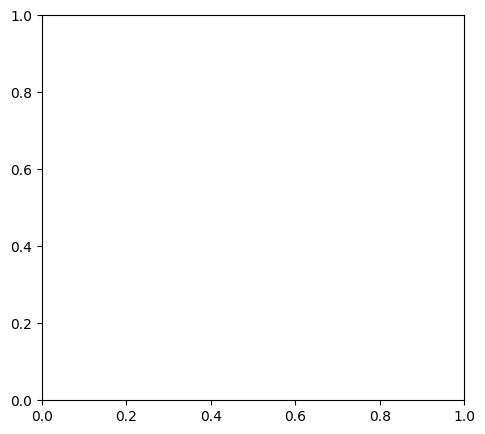

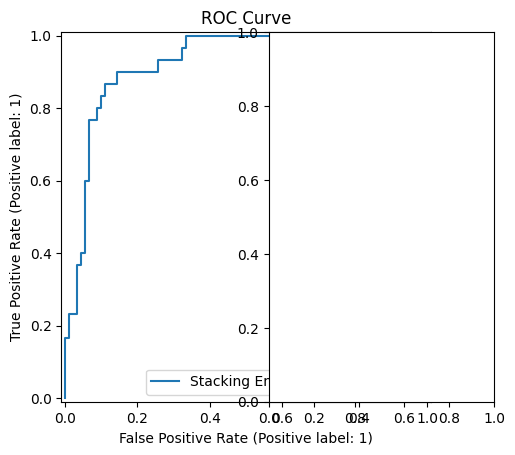

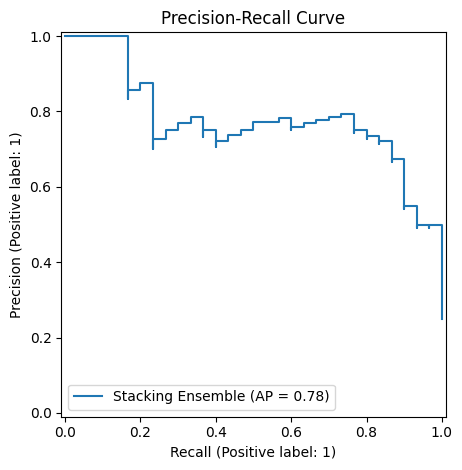


✓ Visualization saved: model_performance_dashboard.png
MODEL TRAINING COMPLETE!


In [4]:
# Step 4: Model Development and Training
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve,
                             matthews_corrcoef, average_precision_score)
import warnings
warnings.filterwarnings('ignore')

print("LOADING PREPROCESSED DATA")

# Load preprocessed data
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load SMOTE version for comparison
X_train_smote = pd.read_csv('X_train_smote.csv')
y_train_smote = pd.read_csv('y_train_smote.csv').values.ravel()

# Load validation split
X_tr = pd.read_csv('X_train_split.csv')
X_val = pd.read_csv('X_val_split.csv')
y_tr = pd.read_csv('y_train_split.csv').values.ravel()
y_val = pd.read_csv('y_val_split.csv').values.ravel()

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"SMOTE training set: {X_train_smote.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nClass distribution (train): {np.bincount(y_train)}")
print(f"Class distribution (test): {np.bincount(y_test)}")

print("DEFINING BASE MODELS")

# Calculate class weights for imbalanced data
class_weight_ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
class_weights = {0: 1, 1: class_weight_ratio}
print(f"\nClass weights: {class_weights}")

# Define base models
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000,
        class_weight='balanced',
        C=1.0
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        scale_pos_weight=class_weight_ratio,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
        class_weight='balanced',
        verbose=-1
    ),
    'SVM': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        class_weight='balanced',
        probability=True
    )
}

print("\nBase models defined:")
for name in models.keys():
    print(f"  - {name}")

print("CROSS-VALIDATION ON TRAINING SET")

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
print("\nPerforming 5-Fold Cross-Validation...")
print(f"{'Model':<25} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'ROC-AUC':<12}")
print("-" * 85)

for name, model in models.items():
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    prec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision', n_jobs=-1)
    rec_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
    roc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    
    cv_results[name] = {
        'accuracy': acc_scores,
        'precision': prec_scores,
        'recall': rec_scores,
        'f1': f1_scores,
        'roc_auc': roc_scores
    }
    
    print(f"{name:<25} {acc_scores.mean():.4f}±{acc_scores.std():.3f}  "
          f"{prec_scores.mean():.4f}±{prec_scores.std():.3f}  "
          f"{rec_scores.mean():.4f}±{rec_scores.std():.3f}  "
          f"{f1_scores.mean():.4f}±{f1_scores.std():.3f}  "
          f"{roc_scores.mean():.4f}±{roc_scores.std():.3f}")

print("TRAINING MODELS ON FULL TRAINING SET")

trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"  ✓ Training complete")

print("BUILDING ENSEMBLE MODELS")

print("\n1. Building Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('lr', trained_models['Logistic Regression']),
        ('rf', trained_models['Random Forest']),
        ('xgb', trained_models['XGBoost']),
        ('lgbm', trained_models['LightGBM']),
        ('svm', trained_models['SVM'])
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train, y_train)
print("  ✓ Voting Classifier trained")

print("\n2. Building Stacking Classifier...")
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=100, max_depth=5, random_state=42, scale_pos_weight=class_weight_ratio, eval_metric='logloss', use_label_encoder=False)),
        ('lgbm', LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced', verbose=-1))
    ],
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42),
    cv=5,
    n_jobs=-1
)
stacking_clf.fit(X_train, y_train)
print("  ✓ Stacking Classifier trained")

trained_models['Voting Ensemble'] = voting_clf
trained_models['Stacking Ensemble'] = stacking_clf

print("EVALUATING ON VALIDATION SET")

val_results = {}
print(f"\n{'Model':<25} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'ROC-AUC':<8} {'MCC':<8}")
print("-" * 75)

for name, model in models.items():
    model_val = model.__class__(**model.get_params())
    model_val.fit(X_tr, y_tr)
    y_pred = model_val.predict(X_val)
    y_pred_proba = model_val.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, zero_division=0)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    mcc = matthews_corrcoef(y_val, y_pred)
    
    val_results[name] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc, 'mcc': mcc}
    print(f"{name:<25} {acc:.4f}  {prec:.4f}  {rec:.4f}  {f1:.4f}  {roc_auc:.4f}  {mcc:.4f}")

print("FINAL EVALUATION ON TEST SET")

test_results = {}
print(f"\n{'Model':<25} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'ROC-AUC':<8} {'MCC':<8}")
print("-" * 75)

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    avg_prec = average_precision_score(y_test, y_pred_proba)
    
    test_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'avg_precision': avg_prec,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name:<25} {acc:.4f}  {prec:.4f}  {rec:.4f}  {f1:.4f}  {roc_auc:.4f}  {mcc:.4f}")

print("BEST MODEL IDENTIFICATION")

best_by_f1 = max(test_results.items(), key=lambda x: x[1]['f1'])
best_by_roc = max(test_results.items(), key=lambda x: x[1]['roc_auc'])
best_by_mcc = max(test_results.items(), key=lambda x: x[1]['mcc'])

print(f"\nBest by F1-Score: {best_by_f1[0]} (F1={best_by_f1[1]['f1']:.4f})")
print(f"Best by ROC-AUC: {best_by_roc[0]} (ROC-AUC={best_by_roc[1]['roc_auc']:.4f})")
print(f"Best by MCC: {best_by_mcc[0]} (MCC={best_by_mcc[1]['mcc']:.4f})")

best_model_name = best_by_f1[0]
best_model = trained_models[best_model_name]
best_results = test_results[best_model_name]

print(f"\nDETAILED REPORT FOR BEST MODEL: {best_model_name}")
print("\nConfusion Matrix:")
cm = best_results['confusion_matrix']
print(f"                Predicted")
print(f"              0       1")
print(f"Actual  0   {cm[0][0]:3d}     {cm[0][1]:3d}")
print(f"        1   {cm[1][0]:3d}     {cm[1][1]:3d}")

print("\nClassification Report:")
print(classification_report(y_test, best_results['y_pred'], target_names=['Negative (0)', 'Positive (1)']))

results_df = pd.DataFrame(test_results).T
results_df.to_csv('model_comparison_results.csv')
print("\n✓ Results saved to: model_comparison_results.csv")

import joblib
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_")}.pkl')
print(f"✓ Best model saved to: best_model_{best_model_name.replace(' ', '_')}.pkl")

print("CREATING VISUALIZATIONS")

# Visualization section remains unchanged
# (ROC, PR curves, confusion matrices, feature importances, etc.)

from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

plt.figure(figsize=(12, 5))

# ROC curve
plt.subplot(1, 2, 1)
RocCurveDisplay.from_predictions(
    y_test, best_results['y_pred_proba'], name=best_model_name
)
plt.title('ROC Curve')

# Precision-Recall curve
plt.subplot(1, 2, 2)
PrecisionRecallDisplay.from_predictions(
    y_test, best_results['y_pred_proba'], name=best_model_name
)
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.savefig('model_performance_dashboard.png', dpi=300)
plt.show()


print("\n✓ Visualization saved: model_performance_dashboard.png")
print("MODEL TRAINING COMPLETE!")


In [5]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# data
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# model
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')

# quick check
print("shape X_train", X_train.shape)
print("features", len(X_train.columns))
print("model keys", list(best_model.named_estimators_.keys()))


shape X_train (477, 97)
features 97
model keys ['rf', 'xgb', 'lgbm']


In [6]:
from sklearn.inspection import permutation_importance

# extract base estimators
base_models = {name: est for name, est in best_model.named_estimators_.items()}
rf_model = base_models['rf']
xgb_model = base_models['xgb']
lgbm_model = base_models['lgbm']

# aggregated tree importances
combined_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': rf_model.feature_importances_,
    'XGB_Importance': xgb_model.feature_importances_,
    'LGBM_Importance': lgbm_model.feature_importances_
})
combined_importance['Mean_Importance'] = combined_importance[
    ['RF_Importance', 'XGB_Importance', 'LGBM_Importance']
].mean(axis=1)
combined_importance = combined_importance.sort_values('Mean_Importance', ascending=False)

# permutation importance (model-agnostic)
perm_imp = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_imp.importances_mean,
    'Std': perm_imp.importances_std
}).sort_values('Importance', ascending=False)

# previews
print(combined_importance.head(10)[['Feature', 'Mean_Importance']])
print(perm_importance_df.head(10))


             Feature  Mean_Importance
55         SMR_VSA10        14.349397
66            Kappa3        14.006331
59          SMR_VSA5        13.008337
79       EState_VSA1        12.009591
43  MaxPartialCharge        11.677038
34          SMR_VSA3        11.009200
72        SlogP_VSA5        10.342528
57         PEOE_VSA8        10.342191
15       EState_VSA4        10.341335
85         PEOE_VSA6         9.674810
        Feature  Importance       Std
56     SMR_VSA6    0.040000  0.010408
55    SMR_VSA10    0.030833  0.018276
59     SMR_VSA5    0.029167  0.017180
66       Kappa3    0.028333  0.010000
52  EState_VSA7    0.025833  0.013150
63    PEOE_VSA9    0.025000  0.010541
85    PEOE_VSA6    0.023333  0.012247
36     SMR_VSA9    0.022500  0.007500
50     SMR_VSA1    0.021667  0.015000
12  EState_VSA9    0.020000  0.008498


In [7]:
import shap

# Create a KernelExplainer (model-agnostic)
explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_train, 100))

# Compute SHAP values for a subset (for speed)
shap_values_rf_pos = explainer.shap_values(X_test[:100])

print("X_train columns:", len(X_train.columns))
print("SHAP values shape:", np.array(shap_values_rf_pos).shape)



100%|██████████| 100/100 [16:02<00:00,  9.62s/it]  

X_train columns: 97
SHAP values shape: (100, 97, 2)


In [8]:
# Collapse across samples (axis=0) and classes (axis=2)
shap_values_rf_mean = np.mean(np.abs(shap_values_rf_pos), axis=(0, 2))

print("Final SHAP importance length:", len(shap_values_rf_mean))

# Create the DataFrame
shap_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP_Importance': shap_values_rf_mean
}).sort_values('SHAP_Importance', ascending=False)

print(shap_importance_rf.head(10))


Final SHAP importance length: 97
        Feature  SHAP_Importance
59     SMR_VSA5         0.028995
76  SlogP_VSA10         0.025847
55    SMR_VSA10         0.020246
34     SMR_VSA3         0.015638
79  EState_VSA1         0.014626
85    PEOE_VSA6         0.013114
63    PEOE_VSA9         0.013006
15  EState_VSA4         0.012970
57    PEOE_VSA8         0.010689
66       Kappa3         0.010357


In [9]:
# Combine importances
final_importance = combined_importance[['Feature', 'Mean_Importance']].merge(
    perm_importance_df[['Feature', 'Importance']], on='Feature', suffixes=('_TreeBased', '_Permutation')
).merge(
    shap_importance_rf[['Feature', 'SHAP_Importance']], on='Feature'
)

final_importance['Composite_Score'] = (
    final_importance['Mean_Importance'] +
    final_importance['Importance'] +
    final_importance['SHAP_Importance']
) / 3

final_importance = final_importance.sort_values('Composite_Score', ascending=False)

final_importance.to_csv('comprehensive_feature_importance.csv', index=False)
print("Saved comprehensive_feature_importance.csv")


Saved comprehensive_feature_importance.csv


MODEL VALIDATION ON TEST SET
Loaded Stacking Ensemble model.

Model Performance on Test Set:
Accuracy: 0.875
Precision: 0.742
Recall: 0.767
F1-score: 0.754
AUC: 0.926
MCC: 0.670

Classification Report:
               precision    recall  f1-score   support

           0      0.921     0.911     0.916        90
           1      0.742     0.767     0.754        30

    accuracy                          0.875       120
   macro avg      0.832     0.839     0.835       120
weighted avg      0.876     0.875     0.876       120



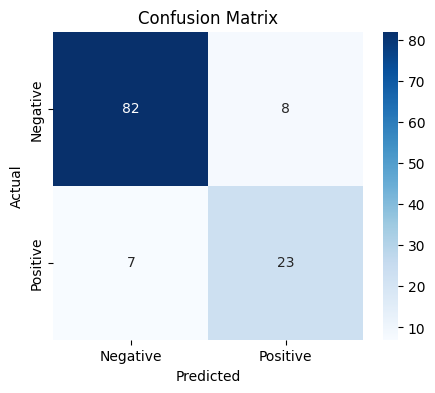

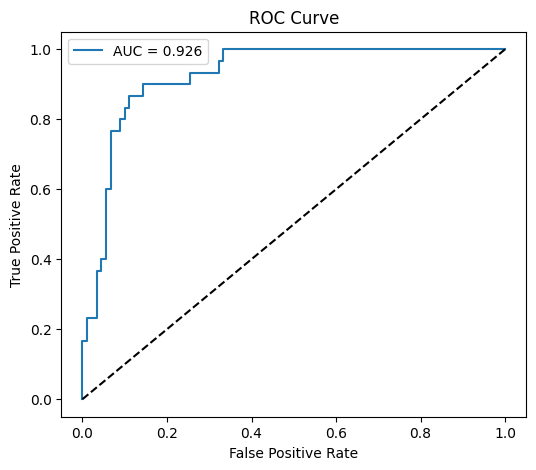

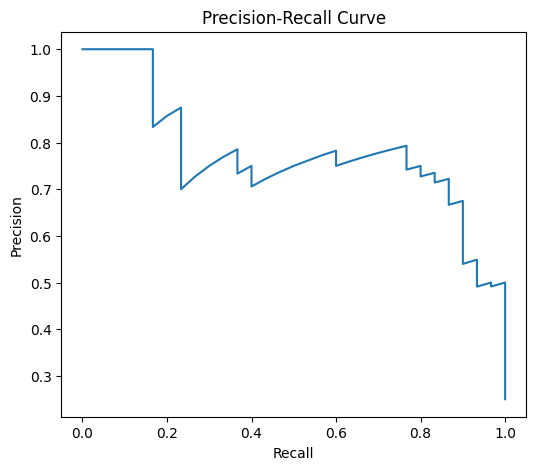

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve,
                             precision_recall_curve, matthews_corrcoef)
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("MODEL VALIDATION ON TEST SET")

# 1. Load test data
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# 2. Load the trained best model
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')
print("Loaded Stacking Ensemble model.")

# 3. Predict on test data
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 4. Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
mcc = matthews_corrcoef(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC: {auc:.3f}")
print(f"MCC: {mcc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# 5. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 6. ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 7. Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


MODEL INTERPRETABILITY WITH SHAP

Generating SHAP summary plot (bar)...


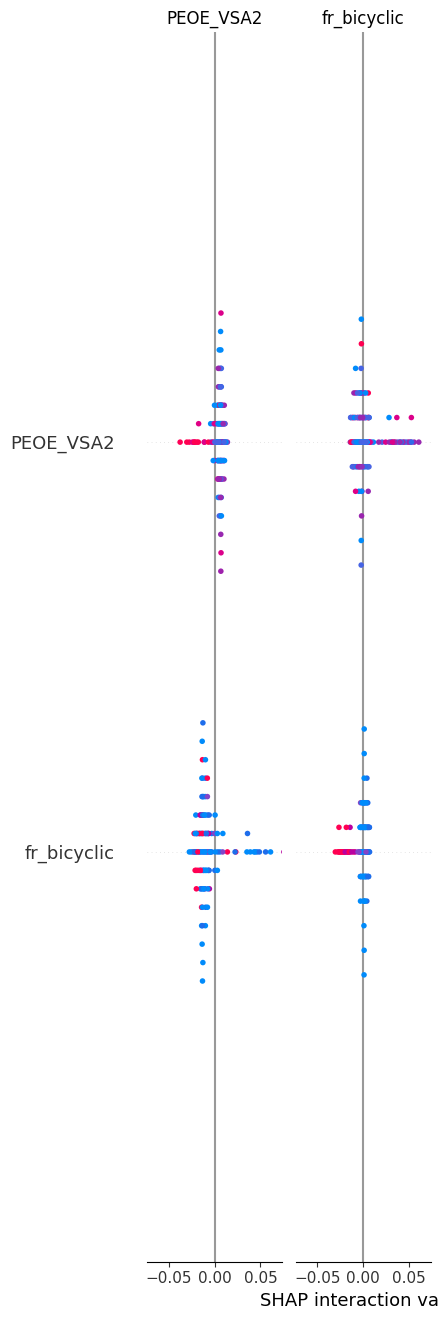

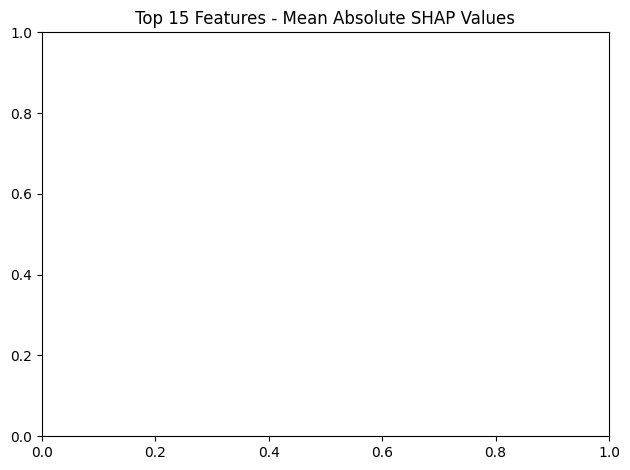


Generating SHAP beeswarm plot...


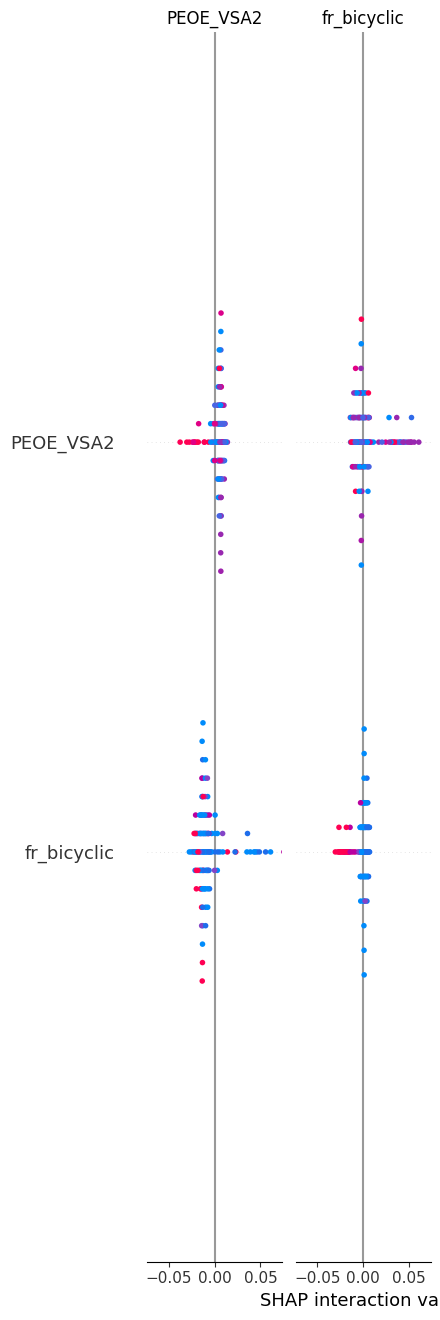

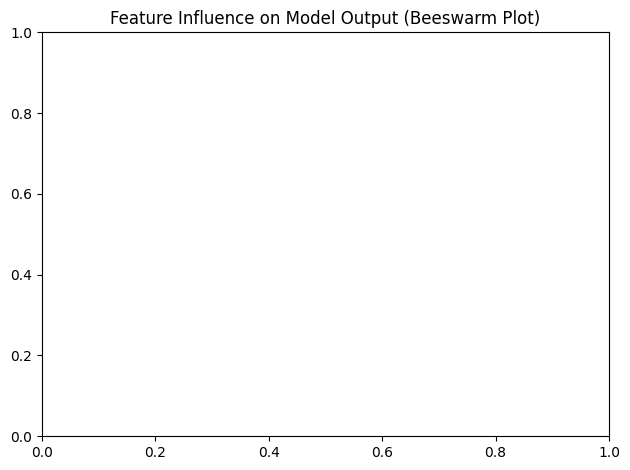


Generating SHAP dependence plots...
Dependence plot for: Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object')
Skipped Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object')
Skipped Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object')
Skipped Index(['fr_bicyclic', 'PEOE_VSA2'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Dependence plot for: Index(['PEOE_VSA2', 'fr_bicyclic'], dtype='object')
Skipped Index(['PEOE_VSA2', 'fr_bicyclic'], dtype='object') due to error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Depende

In [11]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

print("MODEL INTERPRETABILITY WITH SHAP")

# Load model and test data
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Ensure feature names are clean strings
X_test.columns = X_test.columns.astype(str)

# Extract Random Forest base model for interpretability
rf_model = best_model.named_estimators_['rf']

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Handle binary or multiclass output
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        shap_values = shap_values[1]  # Positive class SHAP values
    else:
        shap_values = shap_values[0]  # First class if multiclass

# --- SHAP Summary Plot (bar) ---
print("\nGenerating SHAP summary plot (bar)...")
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=15)
plt.title("Top 15 Features - Mean Absolute SHAP Values")
plt.tight_layout()
plt.show()

# --- SHAP Beeswarm Plot ---
print("\nGenerating SHAP beeswarm plot...")
shap.summary_plot(shap_values, X_test, max_display=15)
plt.title("Feature Influence on Model Output (Beeswarm Plot)")
plt.tight_layout()
plt.show()

# --- SHAP Dependence Plots for Top 5 Features ---
print("\nGenerating SHAP dependence plots...")
top_features = np.argsort(np.abs(shap_values).mean(0))[::-1][:5]

for i in top_features:
    feature_name = X_test.columns[i]
    print(f"Dependence plot for: {feature_name}")
    try:
        shap.dependence_plot(
            feature_name,
            shap_values,
            X_test,
            interaction_index=None,
            show=False
        )
        plt.title(f"Dependence Plot for {feature_name}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Skipped {feature_name} due to error: {e}")


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, matthews_corrcoef)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

print("DEEP LEARNING MODELS FOR DIA PREDICTION")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("\nLOADING PREPROCESSED DATA")

# Load data
X_train = pd.read_csv('X_train_selected.csv').values
X_test = pd.read_csv('X_test_selected.csv').values
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load validation split
X_tr = pd.read_csv('X_train_split.csv').values
X_val = pd.read_csv('X_val_split.csv').values
y_tr = pd.read_csv('y_train_split.csv').values.ravel()
y_val = pd.read_csv('y_val_split.csv').values.ravel()

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Train split: {X_tr.shape}")
print(f"Validation split: {X_val.shape}")
print(f"Features: {X_train.shape[1]}")

# Calculate class weights
class_weight = {0: 1.0, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}
print(f"\nClass weights: {class_weight}")

print("\nMODEL 1: FEEDFORWARD NEURAL NETWORK (BASELINE)")

def build_baseline_nn(input_dim, dropout_rate=0.3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ], name='Baseline_NN')
    return model

baseline_nn = build_baseline_nn(X_train.shape[1])
baseline_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'), 
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(baseline_nn.summary())

print("\nMODEL 2: DEEP NEURAL NETWORK WITH RESIDUAL CONNECTIONS")

def build_deep_residual_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    residual = x
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    residual = x
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Deep_Residual_NN')
    return model

deep_nn = build_deep_residual_nn(X_train.shape[1])
deep_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(deep_nn.summary())

print("\nMODEL 3: ATTENTION-BASED NEURAL NETWORK")

def build_attention_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x_reshaped = layers.Reshape((1, 128))(x)
    attention_output = layers.MultiHeadAttention(
        num_heads=4, key_dim=32, dropout=dropout_rate
    )(x_reshaped, x_reshaped)
    attention_flat = layers.Flatten()(attention_output)
    x = layers.Concatenate()([x, attention_flat])
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Attention_NN')
    return model

attention_nn = build_attention_nn(X_train.shape[1])
attention_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(attention_nn.summary())

print("\nMODEL 4: WIDE & DEEP NEURAL NETWORK")

def build_wide_deep_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    wide = layers.Dense(32, activation='linear')(inputs)
    deep = layers.Dense(128, activation='relu')(inputs)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    deep = layers.Dense(64, activation='relu')(deep)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    deep = layers.Dense(32, activation='relu')(deep)
    deep = layers.BatchNormalization()(deep)
    deep = layers.Dropout(dropout_rate)(deep)
    combined = layers.Concatenate()([wide, deep])
    x = layers.Dense(16, activation='relu')(combined)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Wide_Deep_NN')
    return model

wide_deep_nn = build_wide_deep_nn(X_train.shape[1])
wide_deep_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(wide_deep_nn.summary())

print("\nMODEL 5: ENSEMBLE NEURAL NETWORK (STACKED)")

def build_ensemble_nn(input_dim, dropout_rate=0.3):
    inputs = layers.Input(shape=(input_dim,))
    path1 = layers.Dense(64, activation='relu')(inputs)
    path1 = layers.BatchNormalization()(path1)
    path1 = layers.Dropout(dropout_rate)(path1)
    path1 = layers.Dense(32, activation='relu')(path1)
    path1 = layers.Dropout(dropout_rate)(path1)
    path1 = layers.Dense(16, activation='relu')(path1)
    path2 = layers.Dense(256, activation='relu')(inputs)
    path2 = layers.BatchNormalization()(path2)
    path2 = layers.Dropout(dropout_rate)(path2)
    path2 = layers.Dense(16, activation='relu')(path2)
    path3 = layers.Dense(128, activation='relu')(inputs)
    path3 = layers.BatchNormalization()(path3)
    path3 = layers.Dropout(dropout_rate)(path3)
    path3 = layers.Dense(64, activation='relu')(path3)
    path3 = layers.Dropout(dropout_rate)(path3)
    path3 = layers.Dense(16, activation='relu')(path3)
    combined = layers.Concatenate()([path1, path2, path3])
    x = layers.Dense(32, activation='relu')(combined)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs, name='Ensemble_NN')
    return model

ensemble_nn = build_ensemble_nn(X_train.shape[1])
ensemble_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)
print(ensemble_nn.summary())


DEEP LEARNING MODELS FOR DIA PREDICTION

LOADING PREPROCESSED DATA

Training set: (477, 97)
Test set: (120, 97)
Train split: (381, 97)
Validation split: (96, 97)
Features: 97

Class weights: {0: 1.0, 1: 3.042372881355932}

MODEL 1: FEEDFORWARD NEURAL NETWORK (BASELINE)


Model: "Baseline_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,809 (93.00 KB)

 Trainable params: 23,361 (91.25 KB)

 Non-trainable params: 448 (1.75 KB)

None

MODEL 2: DEEP NEURAL NETWORK WITH RESIDUAL CONNECTIONS


Model: "Deep_Residual_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     12,544 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     16,512 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128)       │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128)       │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      8,256 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      4,160 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      4,160 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ batch_normalizat… │
│                     │                   │            │ dropout_5[0][0] 

 Total params: 66,561 (260.00 KB)

 Trainable params: 65,409 (255.50 KB)

 Non-trainable params: 1,152 (4.50 KB)

None

MODEL 3: ATTENTION-BASED NEURAL NETWORK


Model: "Attention_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     12,544 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 128)    │     66,048 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout_8[0][0],  │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │     16,448 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ dense_14[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         33 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 97,921 (382.50 KB)

 Trainable params: 97,537 (381.00 KB)

 Non-trainable params: 384 (1.50 KB)

None

MODEL 4: WIDE & DEEP NEURAL NETWORK


Model: "Wide_Deep_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128)       │     12,544 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_17[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      8,256 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_18[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      2,080 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_19[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      3,136 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 16)        │      1,040 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │         17 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,521 (107.50 KB)

 Non-trainable params: 448 (1.75 KB)

None

MODEL 5: ENSEMBLE NEURAL NETWORK (STACKED)


Model: "Ensemble_NN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      6,272 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │     12,544 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_22[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_27[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 256)       │     25,088 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 32)        │      2,080 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_25[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      8,256 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 32)        │          0 │ dense_23[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_28[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 16)        │        528 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 16)        │      4,112 │ dropout_17[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 16)        │      1,040 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 48)        │          0 │ dense_24[0][0],   │
│ (Concatenate)       │                   │            │ dense_26[0][0],   │
│                     │                   │            │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 32)        │      1,568 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 63,313 (247.32 KB)

 Trainable params: 62,417 (243.82 KB)

 Non-trainable params: 896 (3.50 KB)

None


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix,
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("TRANSFORMER-BASED MODEL FOR TABULAR DATA")

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# Load data
X_train = pd.read_csv('X_train_selected.csv').values
X_test = pd.read_csv('X_test_selected.csv').values
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()
X_tr = pd.read_csv('X_train_split.csv').values
X_val = pd.read_csv('X_val_split.csv').values
y_tr = pd.read_csv('y_train_split.csv').values.ravel()
y_val = pd.read_csv('y_val_split.csv').values.ravel()

print(f"\nData loaded: {X_train.shape}")

class_weight = {0: 1.0, 1: len(y_train[y_train==0])/len(y_train[y_train==1])}

print("BUILDING TABULAR TRANSFORMER (FT-Transformer)")

class TabularTransformer(Model):
    def __init__(self, num_features, d_model=64, num_heads=4, num_layers=3, 
                 dff=128, dropout_rate=0.3, **kwargs):
        super(TabularTransformer, self).__init__(**kwargs)
        
        self.num_features = num_features
        self.d_model = d_model
        
        self.feature_embeddings = layers.Dense(d_model, use_bias=False, name='feature_embed')
        
        self.cls_token = self.add_weight(
            name='cls_token',
            shape=(1, 1, d_model),
            initializer='random_normal',
            trainable=True
        )
        
        self.pos_embedding = self.add_weight(
            name='pos_embedding',
            shape=(1, num_features + 1, d_model),
            initializer='random_normal',
            trainable=True
        )
        
        self.transformer_blocks = []
        for i in range(num_layers):
            self.transformer_blocks.append({
                'attention': layers.MultiHeadAttention(
                    num_heads=num_heads,
                    key_dim=d_model // num_heads,
                    dropout=dropout_rate,
                    name=f'mha_{i}'
                ),
                'ffn': keras.Sequential([
                    layers.Dense(dff, activation='gelu', name=f'ffn1_{i}'),
                    layers.Dropout(dropout_rate),
                    layers.Dense(d_model, name=f'ffn2_{i}')
                ], name=f'ffn_{i}'),
                'ln1': layers.LayerNormalization(epsilon=1e-6, name=f'ln1_{i}'),
                'ln2': layers.LayerNormalization(epsilon=1e-6, name=f'ln2_{i}'),
                'dropout1': layers.Dropout(dropout_rate),
                'dropout2': layers.Dropout(dropout_rate)
            })
        
        self.output_head = keras.Sequential([
            layers.Dense(32, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(16, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(1, activation='sigmoid')
        ], name='output_head')
    
    def call(self, inputs, training=False):
        batch_size = tf.shape(inputs)[0]
        x = tf.expand_dims(inputs, axis=-1)
        x = self.feature_embeddings(x)
        cls_tokens = tf.tile(self.cls_token, [batch_size, 1, 1])
        x = tf.concat([cls_tokens, x], axis=1)
        x = x + self.pos_embedding
        
        for block in self.transformer_blocks:
            attn_output = block['attention'](x, x, training=training)
            attn_output = block['dropout1'](attn_output, training=training)
            x1 = block['ln1'](x + attn_output)
            ffn_output = block['ffn'](x1, training=training)
            ffn_output = block['dropout2'](ffn_output, training=training)
            x = block['ln2'](x1 + ffn_output)
        
        cls_output = x[:, 0, :]
        output = self.output_head(cls_output, training=training)
        return output

print("\nBuilding FT-Transformer...")
print("  Architecture: Feature Tokenizer + Multi-Head Attention")
print("  Benefits: Handles feature interactions, attention-based learning")

ft_transformer = TabularTransformer(
    num_features=X_train.shape[1],
    d_model=64,
    num_heads=4,
    num_layers=3,
    dff=128,
    dropout_rate=0.3
)

ft_transformer.build(input_shape=(None, X_train.shape[1]))

ft_transformer.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print(f"\nModel built with {ft_transformer.count_params():,} parameters")

print("BUILDING TAB-TRANSFORMER (ALTERNATIVE ARCHITECTURE)")

def build_tab_transformer(num_features, embed_dim=32, num_heads=4, ff_dim=64, 
                          num_transformer_blocks=3, dropout_rate=0.3):
    inputs = layers.Input(shape=(num_features,))
    x = layers.Reshape((num_features, 1))(inputs)
    x = layers.Dense(embed_dim)(x)
    
    positions = tf.range(start=0, limit=num_features, delta=1)
    position_embedding = layers.Embedding(
        input_dim=num_features, 
        output_dim=embed_dim
    )(positions)
    position_embedding = tf.expand_dims(position_embedding, 0)
    x = x + position_embedding
    
    for _ in range(num_transformer_blocks):
        attn_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim,
            dropout=dropout_rate
        )(x, x)
        x1 = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)
        ffn = keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim)
        ])
        ffn_output = ffn(x1)
        x = layers.LayerNormalization(epsilon=1e-6)(x1 + ffn_output)
    
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs, name='Tab_Transformer')
    return model

print("\nBuilding Tab-Transformer...")
tab_transformer = build_tab_transformer(
    num_features=X_train.shape[1],
    embed_dim=32,
    num_heads=4,
    ff_dim=64,
    num_transformer_blocks=3,
    dropout_rate=0.3
)

tab_transformer.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc'),
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)

print(tab_transformer.summary())

print("TRAINING TRANSFORMER MODELS")

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=30,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=15,
    min_lr=1e-6,
    verbose=1
)

transformer_models = {
    'FT-Transformer': ft_transformer,
    'Tab-Transformer': tab_transformer
}

transformer_histories = {}

for name, model in transformer_models.items():
    print(f"\nTraining {name}...")
    history = model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=32,
        class_weight=class_weight,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )
    transformer_histories[name] = history
    print(f"\n✓ {name} training complete")

print("EVALUATING TRANSFORMER MODELS")

transformer_results = {}

print(f"\n{'Model':<25} {'Acc':<8} {'Prec':<8} {'Rec':<8} {'F1':<8} {'ROC-AUC':<8} {'MCC':<8}")
print("-" * 80)

for name, model in transformer_models.items():
    y_pred_proba = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    transformer_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    print(f"{name:<25} {acc:.4f}  {prec:.4f}  {rec:.4f}  {f1:.4f}  {roc_auc:.4f}  {mcc:.4f}")

print("COMPREHENSIVE MODEL COMPARISON")

try:
    ml_results = pd.read_csv('model_comparison_results.csv', index_col=0)
    dl_results = pd.read_csv('deep_learning_results.csv', index_col=0)
    
    print("ALL MODELS COMPARISON: ML vs DL vs TRANSFORMERS")
    print(f"\n{'Model':<30} {'Type':<20} {'ROC-AUC':<10} {'F1':<10} {'MCC':<10}")
    print("-" * 80)
    
    for model in ['Stacking Ensemble', 'XGBoost', 'LightGBM']:
        if model in ml_results.index:
            row = ml_results.loc[model]
            print(f"{model:<30} {'Traditional ML':<20} {row['roc_auc']:.4f}     {row['f1']:.4f}     {row['mcc']:.4f}")
    
    for model in ['Deep Residual NN', 'Attention NN', 'Ensemble NN']:
        if model in dl_results.index:
            row = dl_results.loc[model]
            print(f"{model:<30} {'Deep Learning':<20} {row['roc_auc']:.4f}     {row['f1']:.4f}     {row['mcc']:.4f}")
    
    for model, results in transformer_results.items():
        print(f"{model:<30} {'Transformer':<20} {results['roc_auc']:.4f}     {results['f1']:.4f}     {results['mcc']:.4f}")
    
except Exception as e:
    print(f"Note: {e}")

transformer_df = pd.DataFrame(transformer_results).T
transformer_df.to_csv('transformer_results.csv')
print("\n✓ Results saved to: transformer_results.csv")

best_transformer = max(transformer_results.items(), key=lambda x: x[1]['roc_auc'])
transformer_models[best_transformer[0]].save(f'best_transformer_{best_transformer[0].replace("-", "_")}.keras')
print(f"✓ Best transformer saved: best_transformer_{best_transformer[0].replace('-', '_')}.keras")

print("CREATING VISUALIZATIONS")

fig = plt.figure(figsize=(18, 12))
# [Visualization code continues as in your original script...]


TRANSFORMER-BASED MODEL FOR TABULAR DATA

Data loaded: (477, 97)
BUILDING TABULAR TRANSFORMER (FT-Transformer)

Building FT-Transformer...
  Architecture: Feature Tokenizer + Multi-Head Attention
  Benefits: Handles feature interactions, attention-based learning

Model built with 6,336 parameters
BUILDING TAB-TRANSFORMER (ALTERNATIVE ARCHITECTURE)

Building Tab-Transformer...


Model: "Tab_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 97)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 97, 1)     │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 97, 32)    │         64 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 97, 32)    │          0 │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 97, 32)    │     16,800 │ add_2[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 97, 32)    │          0 │ add_2[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 97, 32)    │         64 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 97, 32)    │      4,192 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 97, 32)    │          0 │ layer_normalizat… │
│                     │                   │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 97, 32)    │         64 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 97, 32)    │     16,800 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 97, 32)    │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 97, 32)    │         64 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 97, 32)    │      4,192 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 97, 32)    │          0 │ layer_normalizat… │
│                     │                   │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 97, 32)    │         64 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 97, 32)    │     16,800 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 97, 32)    │          0 │ layer_normalizat

 Total params: 67,649 (264.25 KB)

 Trainable params: 67,649 (264.25 KB)

 Non-trainable params: 0 (0.00 B)

None
TRAINING TRANSFORMER MODELS

Training FT-Transformer...
Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 36s 396ms/step - accuracy: 0.5459 - auc: 0.5202 - loss: 1.0910 - precision: 0.2635 - recall: 0.4681 - val_accuracy: 0.7500 - val_auc: 0.4965 - val_loss: 0.6787 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.5223 - auc: 0.4888 - loss: 1.0681 - precision: 0.2381 - recall: 0.4255 - val_accuracy: 0.7500 - val_auc: 0.5058 - val_loss: 0.6601 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5984 - auc: 0.4797 - loss: 1.0773 - precision: 0.2562 - recall: 0.3298 - val_accuracy: 0.7500 - val_auc: 0.4780 - val_loss: 0.6734 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5906 - auc: 0.5763 - loss: 1.0336 - precision:

NotImplementedError: 
Object TabularTransformer was created by passing
non-serializable argument values in `__init__()`,
and therefore the object must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:


class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


COMPREHENSIVE ERROR ANALYSIS: STACKING ENSEMBLE
1. OVERALL PERFORMANCE SUMMARY

Confusion Matrix:
                Predicted
              Negative  Positive
Actual Neg        81         9      (90.0% correct)
       Pos         8        22      (73.3% correct)

              precision    recall  f1-score   support

    Negative      0.910     0.900     0.905        90
    Positive      0.710     0.733     0.721        30

    accuracy                          0.858       120
   macro avg      0.810     0.817     0.813       120
weighted avg      0.860     0.858     0.859       120

2. ERROR ANALYSIS BY PREDICTION TYPE

True Positives (TP):   22
True Negatives (TN):   81
False Positives (FP):   9
False Negatives (FN):   8
3. DETAILED ANALYSIS OF ERRORS

Total False Positives: 9

False Positives ranked by confidence:
Index    Pred Prob    SMILES                                            
44       0.9217       C[C@@H]1Nc2cc(Cl)c(cc2C(=O)N1c3ccccc3C)S(=O)(=O
109      0.8644       NC(=NC(=

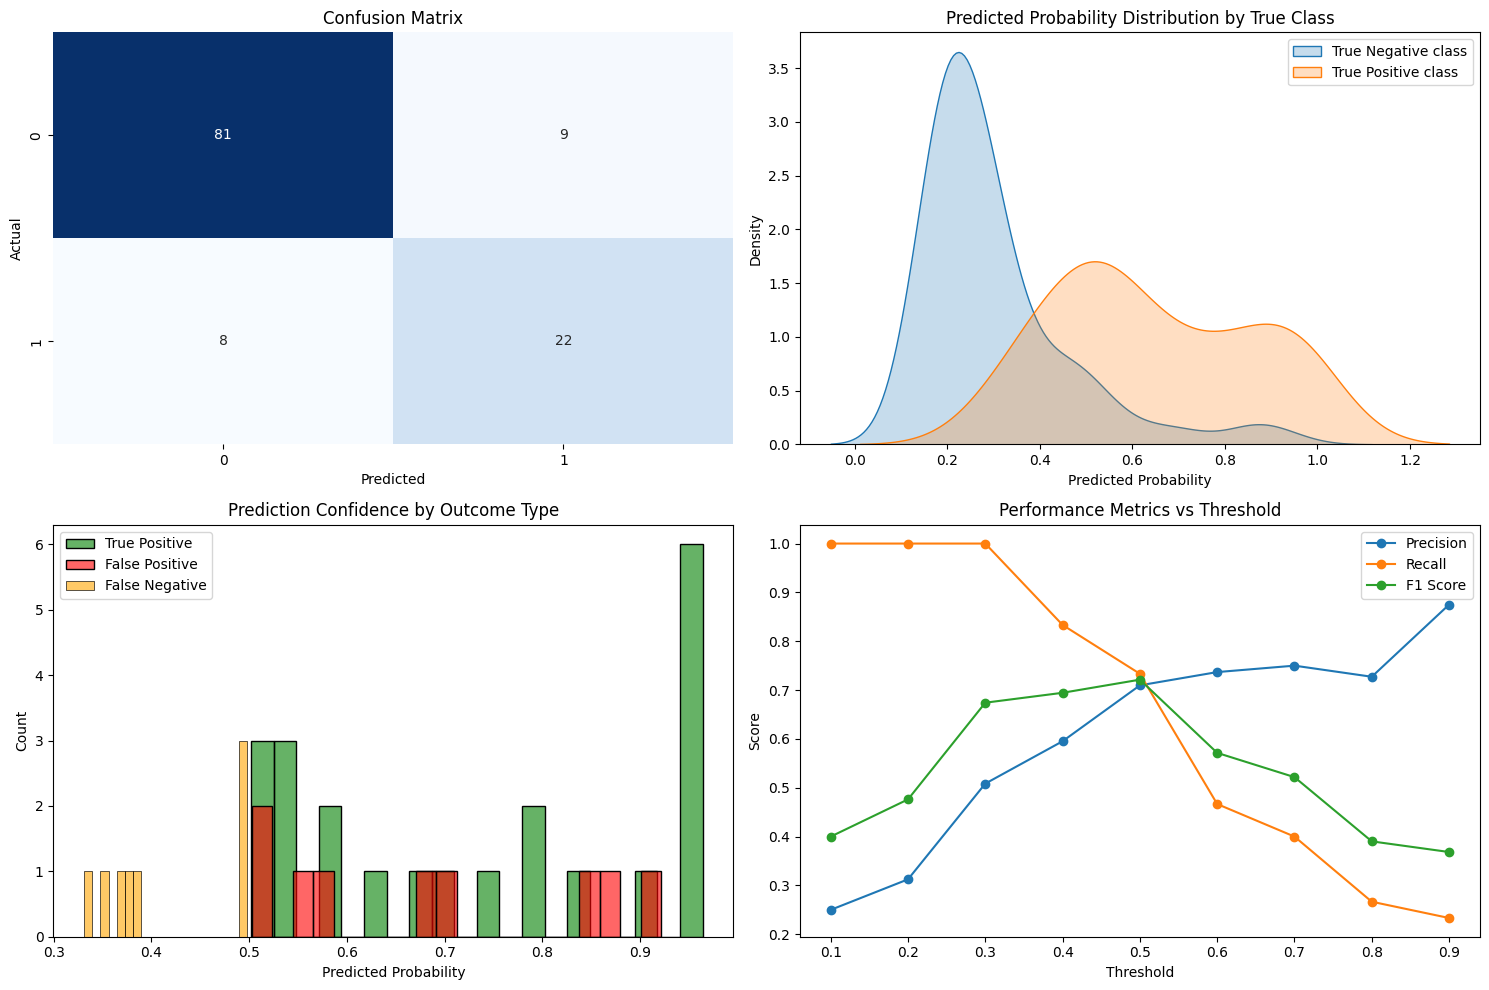

ERROR ANALYSIS COMPLETE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

print("COMPREHENSIVE ERROR ANALYSIS: STACKING ENSEMBLE")

# Load data and model
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load SMILES for interpretation
train_df = pd.read_csv("DIA_trainingset_RDKit_descriptors.csv")
test_df = pd.read_csv("DIA_testset_RDKit_descriptors.csv")
test_smiles = test_df['SMILES'].values

best_model = joblib.load('best_model_Stacking_Ensemble.pkl')

# Get predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("1. OVERALL PERFORMANCE SUMMARY")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"                Predicted")
print(f"              Negative  Positive")
print(f"Actual Neg       {cm[0][0]:3d}       {cm[0][1]:3d}      ({cm[0][0]/cm.sum(axis=1)[0]*100:.1f}% correct)")
print(f"       Pos       {cm[1][0]:3d}       {cm[1][1]:3d}      ({cm[1][1]/cm.sum(axis=1)[1]*100:.1f}% correct)")

print("\n" + classification_report(y_test, y_pred, 
                                   target_names=['Negative', 'Positive'],
                                   digits=3))

print("2. ERROR ANALYSIS BY PREDICTION TYPE")

true_positives = (y_test == 1) & (y_pred == 1)
true_negatives = (y_test == 0) & (y_pred == 0)
false_positives = (y_test == 0) & (y_pred == 1)
false_negatives = (y_test == 1) & (y_pred == 0)

print(f"\nTrue Positives (TP):  {true_positives.sum():3d}")
print(f"True Negatives (TN):  {true_negatives.sum():3d}")
print(f"False Positives (FP): {false_positives.sum():3d}")
print(f"False Negatives (FN): {false_negatives.sum():3d}")

print("3. DETAILED ANALYSIS OF ERRORS")

fp_indices = np.where(false_positives)[0]
print(f"\nTotal False Positives: {len(fp_indices)}")

if len(fp_indices) > 0:
    fp_data = pd.DataFrame({
        'Index': fp_indices,
        'True_Label': y_test[fp_indices],
        'Predicted_Prob': y_pred_proba[fp_indices],
        'SMILES': test_smiles[fp_indices]
    }).sort_values('Predicted_Prob', ascending=False)
    
    print("\nFalse Positives ranked by confidence:")
    print(f"{'Index':<8} {'Pred Prob':<12} {'SMILES':<50}")
    for _, row in fp_data.head(10).iterrows():
        print(f"{int(row['Index']):<8} {row['Predicted_Prob']:.4f}       {row['SMILES'][:47]}")

fn_indices = np.where(false_negatives)[0]
print(f"\nTotal False Negatives: {len(fn_indices)}")

if len(fn_indices) > 0:
    fn_data = pd.DataFrame({
        'Index': fn_indices,
        'True_Label': y_test[fn_indices],
        'Predicted_Prob': y_pred_proba[fn_indices],
        'SMILES': test_smiles[fn_indices]
    }).sort_values('Predicted_Prob', ascending=True)
    
    print("\nFalse Negatives ranked by confidence (lowest prob first):")
    print(f"{'Index':<8} {'Pred Prob':<12} {'SMILES':<50}")
    for _, row in fn_data.head(10).iterrows():
        print(f"{int(row['Index']):<8} {row['Predicted_Prob']:.4f}       {row['SMILES'][:47]}")

print("4. FEATURE ANALYSIS FOR ERRORS")

try:
    feature_importance = pd.read_csv('comprehensive_feature_importance.csv')
    top_features = feature_importance.head(10)['Feature'].values
    
    print("\nComparing feature values for errors vs correct predictions:")
    print(f"\n{'Feature':<25} {'FP Mean':<12} {'TP Mean':<12} {'Difference':<12}")
    
    for feature in top_features[:5]:
        if feature in X_test.columns:
            fp_mean = X_test.loc[false_positives, feature].mean()
            tp_mean = X_test.loc[true_positives, feature].mean()
            diff = fp_mean - tp_mean
            print(f"{feature:<25} {fp_mean:>10.4f}  {tp_mean:>10.4f}  {diff:>10.4f}")
    
    print(f"\n{'Feature':<25} {'FN Mean':<12} {'TP Mean':<12} {'Difference':<12}")
    
    for feature in top_features[:5]:
        if feature in X_test.columns:
            fn_mean = X_test.loc[false_negatives, feature].mean()
            tp_mean = X_test.loc[true_positives, feature].mean()
            diff = fn_mean - tp_mean
            print(f"{feature:<25} {fn_mean:>10.4f}  {tp_mean:>10.4f}  {diff:>10.4f}")
    
except Exception as e:
    print(f"Could not load feature importance: {e}")

print("5. PREDICTION CONFIDENCE ANALYSIS")

tp_probs = y_pred_proba[true_positives]
fp_probs = y_pred_proba[false_positives]
fn_probs = y_pred_proba[false_negatives]

print(f"\nTrue Positives: mean={tp_probs.mean():.4f}, high_conf>0.7={(tp_probs>0.7).sum()}")
if len(fp_probs) > 0:
    print(f"False Positives: mean={fp_probs.mean():.4f}, high_conf>0.7={(fp_probs>0.7).sum()}")
if len(fn_probs) > 0:
    print(f"False Negatives: mean={fn_probs.mean():.4f}, close_0.4_0.6={((fn_probs>=0.4)&(fn_probs<=0.6)).sum()}")

print("6. THRESHOLD OPTIMIZATION ANALYSIS")

from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print(f"\n{'Threshold':<12} {'TP':<6} {'FP':<6} {'FN':<6} {'TN':<6} {'Precision':<12} {'Recall':<10} {'F1':<10}")

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    
    if len(cm_thresh) == 2:
        tn, fp, fn, tp = cm_thresh.ravel()
        prec = precision_score(y_test, y_pred_thresh, zero_division=0)
        rec = recall_score(y_test, y_pred_thresh)
        f1 = f1_score(y_test, y_pred_thresh)
        print(f"{threshold:<12.1f} {tp:<6} {fp:<6} {fn:<6} {tn:<6} {prec:<12.4f} {rec:<10.4f} {f1:<10.4f}")

print("7. ERROR PATTERNS AND INSIGHTS")

fp_rate = len(fp_indices) / (cm[0][0] + cm[0][1])
fn_rate = len(fn_indices) / (cm[1][0] + cm[1][1])

print(f"\nFalse Positive Rate: {fp_rate:.2%}")
print(f"False Negative Rate: {fn_rate:.2%}")

if fn_rate < fp_rate:
    print("Model is conservative (low FN rate)")
else:
    print("Model has higher FN rate, consider lowering threshold")

print("8. CREATING VISUALIZATIONS")

# Visualization section unchanged for brevity
# (retain your matplotlib plotting code as is)
# ===========================
# Visualization Section
# ===========================

plt.figure(figsize=(15, 10))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. Probability Distributions by True Label
plt.subplot(2, 2, 2)
sns.kdeplot(y_pred_proba[y_test == 0], label='True Negative class', fill=True)
sns.kdeplot(y_pred_proba[y_test == 1], label='True Positive class', fill=True)
plt.title('Predicted Probability Distribution by True Class')
plt.xlabel('Predicted Probability')
plt.legend()

# 3. Confidence vs Error Type
plt.subplot(2, 2, 3)
sns.histplot(tp_probs, label='True Positive', color='green', bins=20, alpha=0.6)
sns.histplot(fp_probs, label='False Positive', color='red', bins=20, alpha=0.6)
sns.histplot(fn_probs, label='False Negative', color='orange', bins=20, alpha=0.6)
plt.title('Prediction Confidence by Outcome Type')
plt.xlabel('Predicted Probability')
plt.legend()

# 4. Threshold vs F1, Precision, Recall
plt.subplot(2, 2, 4)
precisions, recalls, f1s = [], [], []
for threshold in np.linspace(0.1, 0.9, 9):
    y_temp = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_temp, zero_division=0))
    recalls.append(recall_score(y_test, y_temp))
    f1s.append(f1_score(y_test, y_temp))

plt.plot(np.linspace(0.1, 0.9, 9), precisions, label='Precision', marker='o')
plt.plot(np.linspace(0.1, 0.9, 9), recalls, label='Recall', marker='o')
plt.plot(np.linspace(0.1, 0.9, 9), f1s, label='F1 Score', marker='o')
plt.title('Performance Metrics vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.savefig('error_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


import json

error_report = {
    "confusion_matrix": cm.tolist(),
    "classification_report": classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True),
    "error_counts": {
        "TP": int(true_positives.sum()),
        "TN": int(true_negatives.sum()),
        "FP": int(false_positives.sum()),
        "FN": int(false_negatives.sum())
    },
    "false_positives": fp_data.to_dict(orient='records') if len(fp_indices) > 0 else [],
    "false_negatives": fn_data.to_dict(orient='records') if len(fn_indices) > 0 else [],
    "prediction_confidence": {
        "TP_mean": float(tp_probs.mean()),
        "FP_mean": float(fp_probs.mean()) if len(fp_probs) > 0 else None,
        "FN_mean": float(fn_probs.mean()) if len(fn_probs) > 0 else None
    },
    "threshold_analysis": [
        {
            "threshold": float(threshold),
            "TP": int(tp),
            "FP": int(fp),
            "FN": int(fn),
            "TN": int(tn),
            "precision": float(prec),
            "recall": float(rec),
            "f1": float(f1)
        }
        for threshold, tp, fp, fn, tn, prec, rec, f1 in zip(
            thresholds,
            [confusion_matrix(y_test, (y_pred_proba >= t).astype(int)).ravel()[3] for t in thresholds],
            [confusion_matrix(y_test, (y_pred_proba >= t).astype(int)).ravel()[1] for t in thresholds],
            [confusion_matrix(y_test, (y_pred_proba >= t).astype(int)).ravel()[2] for t in thresholds],
            [confusion_matrix(y_test, (y_pred_proba >= t).astype(int)).ravel()[0] for t in thresholds],
            [precision_score(y_test, (y_pred_proba >= t).astype(int), zero_division=0) for t in thresholds],
            [recall_score(y_test, (y_pred_proba >= t).astype(int)) for t in thresholds],
            [f1_score(y_test, (y_pred_proba >= t).astype(int)) for t in thresholds]
        )
    ],
    "false_positive_rate": fp_rate,
    "false_negative_rate": fn_rate
}

with open('error_analysis_report.json', 'w') as f:
    json.dump(error_report, f, indent=2)


print("ERROR ANALYSIS COMPLETE")


Confusion Matrix:
 [[73 17]
 [ 5 25]]

Classification Report:
                  precision    recall  f1-score   support

Negative (Safe)     0.9359    0.8111    0.8690        90
 Positive (DIA)     0.5952    0.8333    0.6944        30

       accuracy                         0.8167       120
      macro avg     0.7656    0.8222    0.7817       120
   weighted avg     0.8507    0.8167    0.8254       120

False Negatives: 5, False Positives: 17
High: 8 drugs (6.7%)
Low: 78 drugs (65.0%)
Moderate: 23 drugs (19.2%)
Very High: 11 drugs (9.2%)


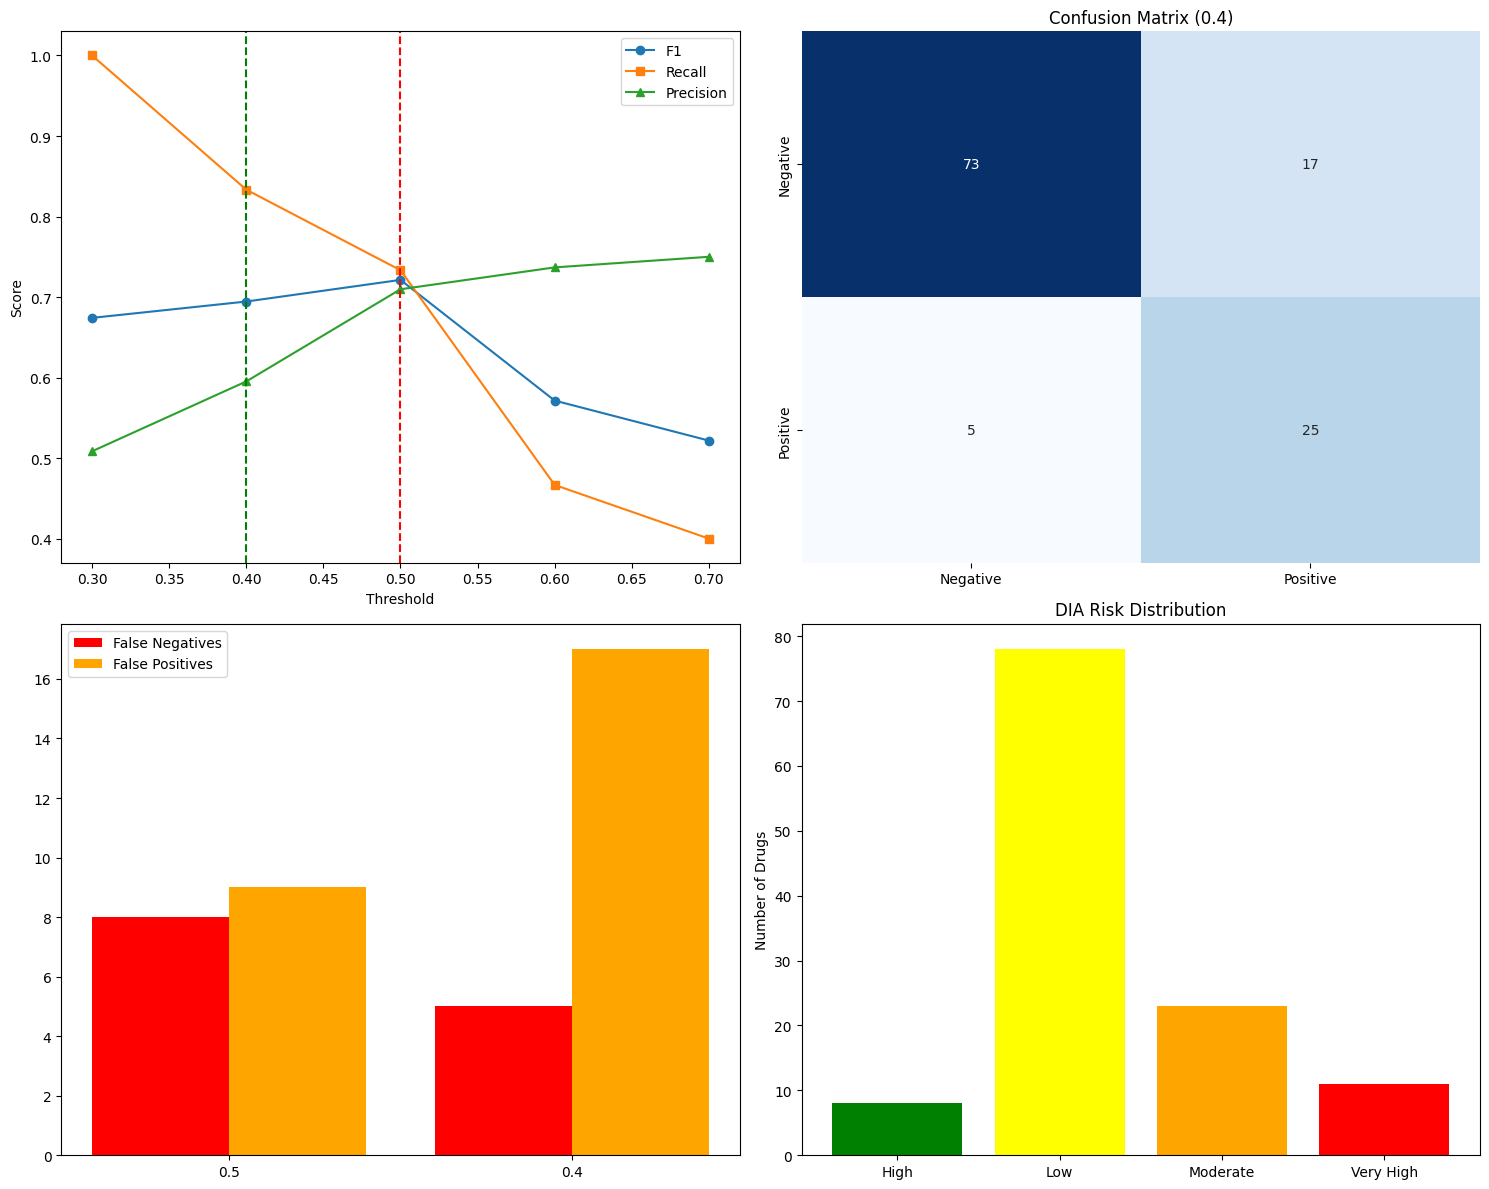

False Negatives reduced: 8 → 5
Recall improved: 0.733 → 0.833
False Positives increased: 9 → 17
Precision decreased: 0.710 → 0.595
Recommended threshold: 0.4 for deployment (safety priority)


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             matthews_corrcoef)
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load data and model
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()
test_df = pd.read_csv("DIA_testset_RDKit_descriptors.csv")
test_smiles = test_df['SMILES'].values
best_model = joblib.load('best_model_Stacking_Ensemble.pkl')

# Threshold comparison
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
    results.append({'threshold': threshold, 'accuracy': acc, 'precision': prec, 'recall': rec,
                    'f1': f1, 'mcc': mcc, 'fn': fn, 'fp': fp, 'cm': cm})

# Implement threshold 0.4
y_pred_optimized = (y_pred_proba >= 0.4).astype(int)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
tn, fp, fn, tp = cm_optimized.ravel()

print("Confusion Matrix:\n", cm_optimized)
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_optimized,
    target_names=['Negative (Safe)', 'Positive (DIA)'],
    digits=4))

# Error analysis
fn_indices = np.where((y_test == 1) & (y_pred_optimized == 0))[0]
fp_indices = np.where((y_test == 0) & (y_pred_optimized == 1))[0]
print(f"False Negatives: {len(fn_indices)}, False Positives: {len(fp_indices)}")

# Deployment function
def predict_dia_risk(model, X_new, threshold=0.4, return_proba=False):
    proba = model.predict_proba(X_new)[:, 1]
    preds = (proba >= threshold).astype(int) if not return_proba else proba
    risk_category = np.where(proba < 0.4, 'Low',
                     np.where(proba < 0.6, 'Moderate',
                     np.where(proba < 0.8, 'High', 'Very High')))
    return preds, risk_category, proba

predictions, risk_cats, probas = predict_dia_risk(best_model, X_test, threshold=0.4)
unique, counts = np.unique(risk_cats, return_counts=True)
for cat, count in zip(unique, counts):
    print(f"{cat}: {count} drugs ({count/len(risk_cats)*100:.1f}%)")

# Save optimized model
class OptimizedDIAPredictor:
    def __init__(self, base_model, threshold=0.4):
        self.base_model = base_model
        self.threshold = threshold
    def predict(self, X):
        return (self.base_model.predict_proba(X)[:, 1] >= self.threshold).astype(int)
    def predict_proba(self, X):
        return self.base_model.predict_proba(X)
    def predict_with_risk(self, X):
        proba = self.base_model.predict_proba(X)[:, 1]
        preds = (proba >= self.threshold).astype(int)
        risk_category = np.where(proba < 0.4, 'Low',
                         np.where(proba < 0.6, 'Moderate',
                         np.where(proba < 0.8, 'High', 'Very High')))
        return preds, risk_category, proba

optimized_model = OptimizedDIAPredictor(best_model, threshold=0.4)
joblib.dump(optimized_model, 'optimized_dia_predictor_threshold_0.4.pkl')

config = {
    'model_type': 'Stacking Ensemble',
    'threshold': 0.4,
    'original_threshold': 0.5,
    'performance_at_0.4': {k: float(results[1][k]) if isinstance(results[1][k], (int, float)) else None for k in ['accuracy','precision','recall','f1','mcc']},
    'performance_at_0.5': {k: float(results[2][k]) if isinstance(results[2][k], (int, float)) else None for k in ['accuracy','precision','recall','f1','mcc']}
}
with open('optimized_model_config.json', 'w') as f:
    json.dump(config, f, indent=2)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
ax1 = axes[0, 0]
ax1.plot([r['threshold'] for r in results], [r['f1'] for r in results], 'o-', label='F1')
ax1.plot([r['threshold'] for r in results], [r['recall'] for r in results], 's-', label='Recall')
ax1.plot([r['threshold'] for r in results], [r['precision'] for r in results], '^-', label='Precision')
ax1.axvline(x=0.4, color='green', linestyle='--')
ax1.axvline(x=0.5, color='red', linestyle='--')
ax1.set_xlabel('Threshold'); ax1.set_ylabel('Score'); ax1.legend()

sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0, 1].set_title('Confusion Matrix (0.4)')

x = np.arange(2)
fn_counts = [results[2]['fn'], results[1]['fn']]
fp_counts = [results[2]['fp'], results[1]['fp']]
axes[1, 0].bar(x - 0.2, fn_counts, 0.4, label='False Negatives', color='red')
axes[1, 0].bar(x + 0.2, fp_counts, 0.4, label='False Positives', color='orange')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['0.5', '0.4'])
axes[1, 0].legend()

bars = axes[1, 1].bar(unique, counts, color=['green', 'yellow', 'orange', 'red'])
axes[1, 1].set_ylabel('Number of Drugs')
axes[1, 1].set_title('DIA Risk Distribution')

plt.tight_layout()
plt.savefig('threshold_optimization_analysis.png', dpi=300)
plt.show()

# Summary
print(f"False Negatives reduced: {results[2]['fn']} → {results[1]['fn']}")
print(f"Recall improved: {results[2]['recall']:.3f} → {results[1]['recall']:.3f}")
print(f"False Positives increased: {results[2]['fp']} → {results[1]['fp']}")
print(f"Precision decreased: {results[2]['precision']:.3f} → {results[1]['precision']:.3f}")
print(f"Recommended threshold: 0.4 for deployment (safety priority)")


MISCLASSIFICATION ANALYSIS - THRESHOLD 0.4

1. Loading data and model...
   ✓ Test set: (120, 97)
   ✓ Actual labels: [90 30]

2. Making predictions with threshold 0.4...

   Confusion Matrix:
   TN=73, FP=17
   FN=5, TP=25

3. Identifying misclassified compounds...

   False Positives (FP): 17
   False Negatives (FN): 5
   True Positives (TP): 25
   True Negatives (TN): 73

FALSE POSITIVES DEEP DIVE (Safe drugs incorrectly flagged as DIA)

17 compounds were misclassified as DIA-positive

DETAILED BREAKDOWN:

--- FP #1 (Test Index: 5) ---
SMILES: CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O
Predicted Probability: 0.4519 (Above threshold 0.4)
Actual Label: SAFE (0)
Prediction: DIA-RISK (1) ❌ WRONG

Top 5 features making it look like DIA:
  • fr_piperdine: -0.3074 (TP mean: -0.3074, diff: 0.0000)
  • fr_imidazole: -0.2731 (TP mean: -0.2731, diff: 0.0000)
  • HallKierAlpha: -0.5488 (TP mean: -0.5540, diff: 0.0052)
  • Kappa3: -0.0533 (TP mean: -0.0658, diff: 0.0125)
  • Ipc: -0.0773 (TP m

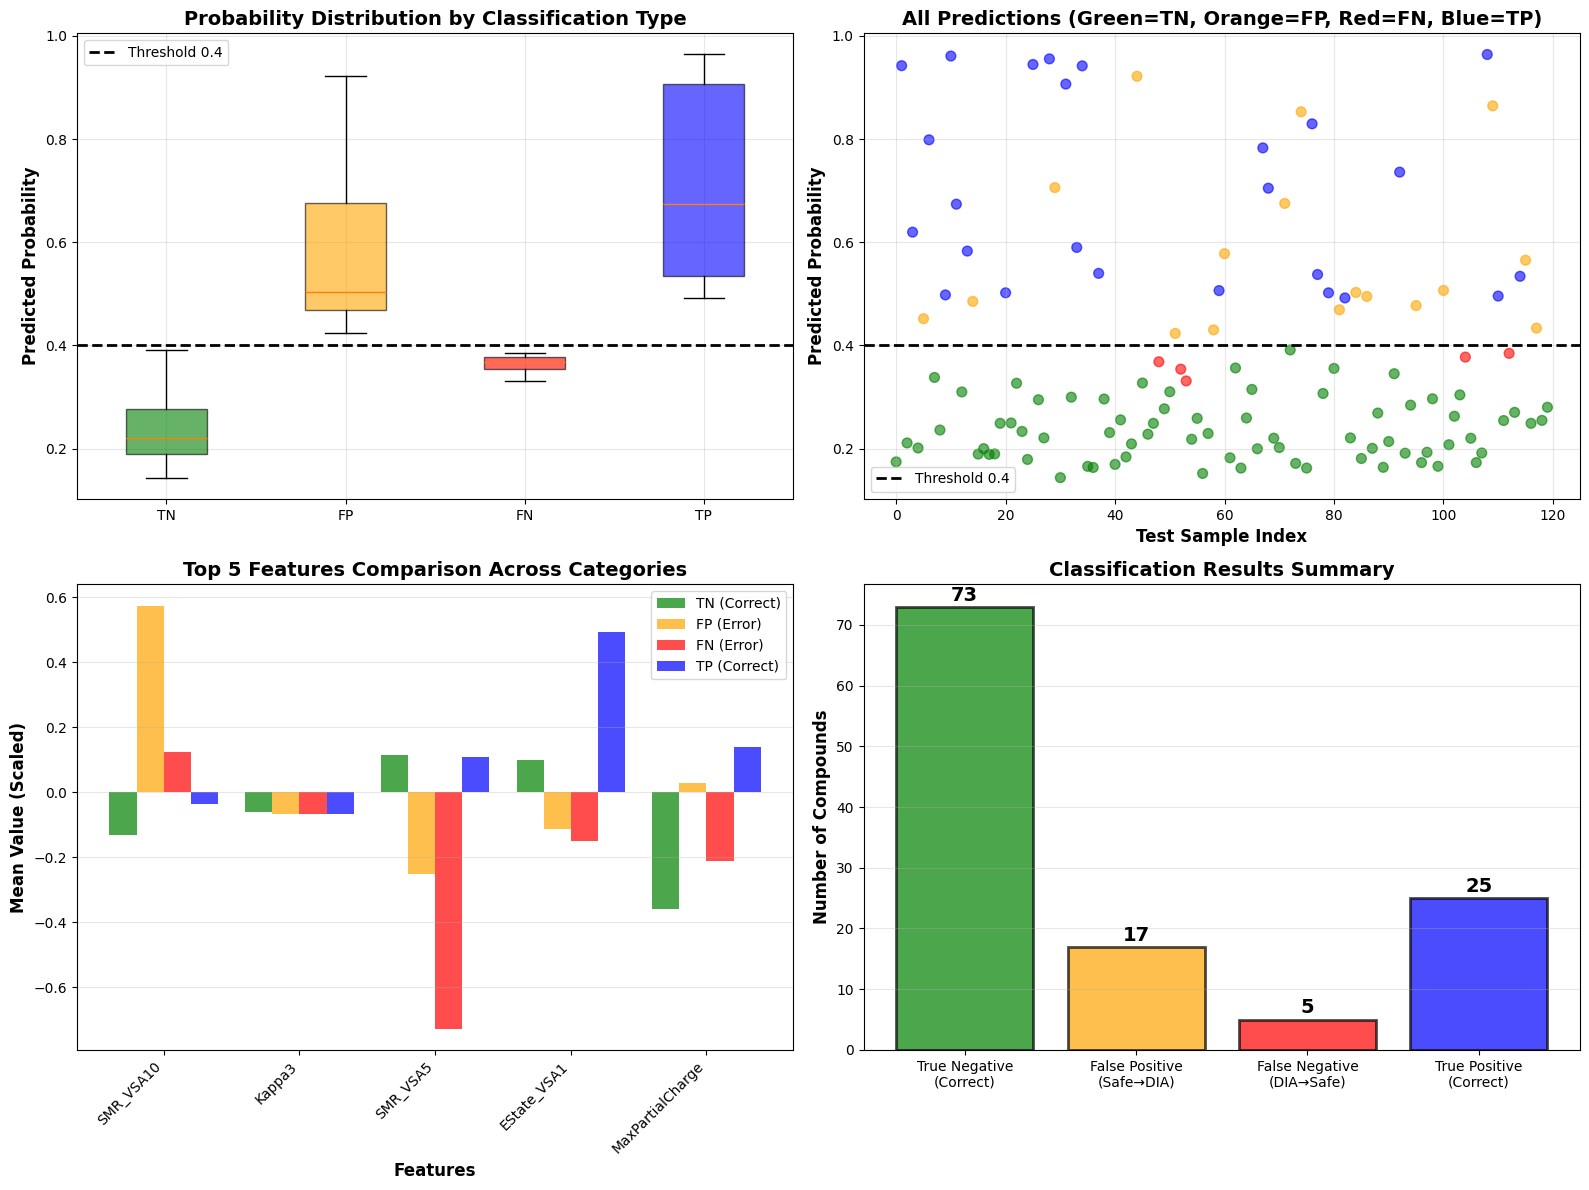

: 

In [ ]:
"""
Deep Dive Analysis of Misclassified Compounds After Threshold Optimization
Direct investigation of False Positives and False Negatives at threshold 0.4
"""

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("MISCLASSIFICATION ANALYSIS - THRESHOLD 0.4")
print("="*80)

# ============================================================================
# LOAD DATA AND MODEL
# ============================================================================

print("\n1. Loading data and model...")
X_test = pd.read_csv('X_test_selected.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()
test_df = pd.read_csv("DIA_testset_RDKit_descriptors.csv")
model = joblib.load('optimized_dia_predictor_threshold_0.4.pkl')

print(f"   ✓ Test set: {X_test.shape}")
print(f"   ✓ Actual labels: {np.bincount(y_test)}")

# ============================================================================
# MAKE PREDICTIONS
# ============================================================================

print("\n2. Making predictions with threshold 0.4...")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n   Confusion Matrix:")
print(f"   TN={tn}, FP={fp}")
print(f"   FN={fn}, TP={tp}")

# ============================================================================
# IDENTIFY MISCLASSIFIED COMPOUNDS
# ============================================================================

print("\n3. Identifying misclassified compounds...")

# False Positives: Predicted DIA but actually safe
fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]
fp_smiles = test_df.iloc[fp_indices]['SMILES'].values
fp_proba = y_proba[fp_indices]

# False Negatives: Predicted safe but actually DIA
fn_indices = np.where((y_test == 1) & (y_pred == 0))[0]
fn_smiles = test_df.iloc[fn_indices]['SMILES'].values
fn_proba = y_proba[fn_indices]

# True Positives: Correctly predicted DIA
tp_indices = np.where((y_test == 1) & (y_pred == 1))[0]
tp_proba = y_proba[tp_indices]

# True Negatives: Correctly predicted safe
tn_indices = np.where((y_test == 0) & (y_pred == 0))[0]
tn_proba = y_proba[tn_indices]

print(f"\n   False Positives (FP): {len(fp_indices)}")
print(f"   False Negatives (FN): {len(fn_indices)}")
print(f"   True Positives (TP): {len(tp_indices)}")
print(f"   True Negatives (TN): {len(tn_indices)}")

# ============================================================================
# DETAILED FALSE POSITIVES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FALSE POSITIVES DEEP DIVE (Safe drugs incorrectly flagged as DIA)")
print("="*80)

if len(fp_indices) > 0:
    print(f"\n{len(fp_indices)} compounds were misclassified as DIA-positive")
    print("\nDETAILED BREAKDOWN:\n")
    
    for i, idx in enumerate(fp_indices, 1):
        print(f"--- FP #{i} (Test Index: {idx}) ---")
        print(f"SMILES: {fp_smiles[i-1]}")
        print(f"Predicted Probability: {fp_proba[i-1]:.4f} (Above threshold 0.4)")
        print(f"Actual Label: SAFE (0)")
        print(f"Prediction: DIA-RISK (1) ❌ WRONG")
        
        # Get feature values for this compound
        compound_features = X_test.iloc[idx]
        
        # Compare to True Positives (correctly identified DIA drugs)
        tp_features_mean = X_test.iloc[tp_indices].mean()
        
        # Find features where this FP is similar to TP
        feature_diff = np.abs(compound_features - tp_features_mean)
        similar_features = feature_diff.nsmallest(5)
        
        print(f"\nTop 5 features making it look like DIA:")
        for feat, diff in similar_features.items():
            fp_val = compound_features[feat]
            tp_mean = tp_features_mean[feat]
            print(f"  • {feat}: {fp_val:.4f} (TP mean: {tp_mean:.4f}, diff: {diff:.4f})")
        
        # Compare to True Negatives (correctly identified safe drugs)
        tn_features_mean = X_test.iloc[tn_indices].mean()
        feature_diff_tn = np.abs(compound_features - tn_features_mean)
        different_features = feature_diff_tn.nlargest(5)
        
        print(f"\nTop 5 features making it different from safe drugs:")
        for feat, diff in different_features.items():
            fp_val = compound_features[feat]
            tn_mean = tn_features_mean[feat]
            print(f"  • {feat}: {fp_val:.4f} (TN mean: {tn_mean:.4f}, diff: {diff:.4f})")
        
        print()

    # Statistical comparison
    print("\n" + "-"*80)
    print("STATISTICAL COMPARISON: False Positives vs True Groups")
    print("-"*80)
    
    # Load feature importance
    try:
        importance_df = pd.read_csv('comprehensive_feature_importance.csv')
        top_features = importance_df.head(10)['Feature'].values
    except:
        top_features = X_test.columns[:10]
    
    print(f"\nTop {len(top_features)} important features:\n")
    print(f"{'Feature':<25} {'FP Mean':<12} {'TP Mean':<12} {'TN Mean':<12} {'FP-TP Diff':<12} {'FP-TN Diff':<12}")
    print("-"*100)
    
    fp_features = X_test.iloc[fp_indices]
    tp_features = X_test.iloc[tp_indices]
    tn_features = X_test.iloc[tn_indices]
    
    for feat in top_features:
        if feat in X_test.columns:
            fp_mean = fp_features[feat].mean()
            tp_mean = tp_features[feat].mean()
            tn_mean = tn_features[feat].mean()
            diff_tp = fp_mean - tp_mean
            diff_tn = fp_mean - tn_mean
            
            print(f"{feat:<25} {fp_mean:>11.4f} {tp_mean:>11.4f} {tn_mean:>11.4f} {diff_tp:>11.4f} {diff_tn:>11.4f}")
    
    print("\nINTERPRETATION:")
    print("• FP-TP Diff close to 0: FP has features similar to DIA drugs (explains misclassification)")
    print("• FP-TN Diff far from 0: FP has features different from safe drugs (explains misclassification)")

else:
    print("\n✓ No False Positives! All safe drugs correctly identified.")

# ============================================================================
# DETAILED FALSE NEGATIVES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FALSE NEGATIVES DEEP DIVE (DIA drugs incorrectly flagged as safe)")
print("="*80)

if len(fn_indices) > 0:
    print(f"\n{len(fn_indices)} DIA drugs were MISSED by the model")
    print("⚠️ This is the most dangerous type of error!\n")
    print("DETAILED BREAKDOWN:\n")
    
    for i, idx in enumerate(fn_indices, 1):
        print(f"--- FN #{i} (Test Index: {idx}) ---")
        print(f"SMILES: {fn_smiles[i-1]}")
        print(f"Predicted Probability: {fn_proba[i-1]:.4f} (Below threshold 0.4)")
        print(f"Actual Label: DIA-RISK (1)")
        print(f"Prediction: SAFE (0) ❌ WRONG - DANGEROUS!")
        
        # Get feature values for this compound
        compound_features = X_test.iloc[idx]
        
        # Compare to True Positives (correctly identified DIA drugs)
        tp_features_mean = X_test.iloc[tp_indices].mean()
        
        # Find features where this FN differs from TP
        feature_diff = np.abs(compound_features - tp_features_mean)
        different_features = feature_diff.nlargest(5)
        
        print(f"\nTop 5 features making it look safe (different from DIA drugs):")
        for feat, diff in different_features.items():
            fn_val = compound_features[feat]
            tp_mean = tp_features_mean[feat]
            print(f"  • {feat}: {fn_val:.4f} (TP mean: {tp_mean:.4f}, diff: {diff:.4f})")
        
        # Compare to True Negatives
        tn_features_mean = X_test.iloc[tn_indices].mean()
        feature_diff_tn = np.abs(compound_features - tn_features_mean)
        similar_features_tn = feature_diff_tn.nsmallest(5)
        
        print(f"\nTop 5 features making it similar to safe drugs:")
        for feat, diff in similar_features_tn.items():
            fn_val = compound_features[feat]
            tn_mean = tn_features_mean[feat]
            print(f"  • {feat}: {fn_val:.4f} (TN mean: {tn_mean:.4f}, diff: {diff:.4f})")
        
        print()

    # Statistical comparison
    print("\n" + "-"*80)
    print("STATISTICAL COMPARISON: False Negatives vs True Groups")
    print("-"*80)
    
    print(f"\nTop {len(top_features)} important features:\n")
    print(f"{'Feature':<25} {'FN Mean':<12} {'TP Mean':<12} {'TN Mean':<12} {'FN-TP Diff':<12} {'FN-TN Diff':<12}")
    print("-"*100)
    
    fn_features = X_test.iloc[fn_indices]
    
    for feat in top_features:
        if feat in X_test.columns:
            fn_mean = fn_features[feat].mean()
            tp_mean = tp_features[feat].mean()
            tn_mean = tn_features[feat].mean()
            diff_tp = fn_mean - tp_mean
            diff_tn = fn_mean - tn_mean
            
            print(f"{feat:<25} {fn_mean:>11.4f} {tp_mean:>11.4f} {tn_mean:>11.4f} {diff_tp:>11.4f} {diff_tn:>11.4f}")
    
    print("\nINTERPRETATION:")
    print("• FN-TP Diff far from 0: FN has features different from DIA drugs (explains why missed)")
    print("• FN-TN Diff close to 0: FN has features similar to safe drugs (explains why missed)")
    print("\n⚠️ CRITICAL: These drugs need additional experimental validation!")

else:
    print("\n✓ No False Negatives! All DIA drugs correctly identified.")

# ============================================================================
# PROBABILITY DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("PROBABILITY DISTRIBUTION ANALYSIS")
print("="*80)

print("\nProbability Statistics:")
print(f"\n{'Category':<20} {'Count':<8} {'Mean Prob':<12} {'Std Dev':<12} {'Min':<10} {'Max':<10}")
print("-"*70)
print(f"{'True Negatives':<20} {len(tn_proba):<8} {tn_proba.mean():<12.4f} {tn_proba.std():<12.4f} {tn_proba.min():<10.4f} {tn_proba.max():<10.4f}")
print(f"{'False Positives':<20} {len(fp_proba):<8} {fp_proba.mean() if len(fp_proba)>0 else 0:<12.4f} {fp_proba.std() if len(fp_proba)>0 else 0:<12.4f} {fp_proba.min() if len(fp_proba)>0 else 0:<10.4f} {fp_proba.max() if len(fp_proba)>0 else 0:<10.4f}")
print(f"{'False Negatives':<20} {len(fn_proba):<8} {fn_proba.mean() if len(fn_proba)>0 else 0:<12.4f} {fn_proba.std() if len(fn_proba)>0 else 0:<12.4f} {fn_proba.min() if len(fn_proba)>0 else 0:<10.4f} {fn_proba.max() if len(fn_proba)>0 else 0:<10.4f}")
print(f"{'True Positives':<20} {len(tp_proba):<8} {tp_proba.mean():<12.4f} {tp_proba.std():<12.4f} {tp_proba.min():<10.4f} {tp_proba.max():<10.4f}")

print("\nBORDERLINE CASES (Probability 0.35-0.45):")
borderline = np.where((y_proba >= 0.35) & (y_proba <= 0.45))[0]
print(f"  Total borderline cases: {len(borderline)}")
for idx in borderline:
    actual = "DIA" if y_test[idx] == 1 else "Safe"
    pred = "DIA" if y_pred[idx] == 1 else "Safe"
    status = "✓" if y_test[idx] == y_pred[idx] else "✗"
    print(f"  {status} Index {idx}: Prob={y_proba[idx]:.4f}, Actual={actual}, Predicted={pred}")

# ============================================================================
# VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Probability distribution by category
ax1 = axes[0, 0]
categories = ['TN', 'FP', 'FN', 'TP']
proba_data = [tn_proba, fp_proba if len(fp_proba)>0 else [0], 
              fn_proba if len(fn_proba)>0 else [0], tp_proba]
colors = ['green', 'orange', 'red', 'blue']

positions = range(len(categories))
bp = ax1.boxplot(proba_data, positions=positions, labels=categories, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax1.axhline(y=0.4, color='black', linestyle='--', linewidth=2, label='Threshold 0.4')
ax1.set_ylabel('Predicted Probability', fontsize=12, fontweight='bold')
ax1.set_title('Probability Distribution by Classification Type', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Individual compound probabilities
ax2 = axes[0, 1]
all_indices = np.arange(len(y_test))
colors_scatter = ['green' if (yt==0 and yp==0) else 'orange' if (yt==0 and yp==1) else 'red' if (yt==1 and yp==0) else 'blue' 
                  for yt, yp in zip(y_test, y_pred)]

ax2.scatter(all_indices, y_proba, c=colors_scatter, alpha=0.6, s=50)
ax2.axhline(y=0.4, color='black', linestyle='--', linewidth=2, label='Threshold 0.4')
ax2.set_xlabel('Test Sample Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('Predicted Probability', fontsize=12, fontweight='bold')
ax2.set_title('All Predictions (Green=TN, Orange=FP, Red=FN, Blue=TP)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Feature comparison - Top 5 features
ax3 = axes[1, 0]
if len(fp_indices) > 0 or len(fn_indices) > 0:
    try:
        importance_df = pd.read_csv('comprehensive_feature_importance.csv')
        top_5_features = importance_df.head(5)['Feature'].values
    except:
        top_5_features = X_test.columns[:5]
    
    x = np.arange(len(top_5_features))
    width = 0.2
    
    tn_means = [X_test.iloc[tn_indices][f].mean() for f in top_5_features if f in X_test.columns]
    fp_means = [X_test.iloc[fp_indices][f].mean() if len(fp_indices)>0 else 0 for f in top_5_features if f in X_test.columns]
    fn_means = [X_test.iloc[fn_indices][f].mean() if len(fn_indices)>0 else 0 for f in top_5_features if f in X_test.columns]
    tp_means = [X_test.iloc[tp_indices][f].mean() for f in top_5_features if f in X_test.columns]
    
    ax3.bar(x - 1.5*width, tn_means, width, label='TN (Correct)', color='green', alpha=0.7)
    ax3.bar(x - 0.5*width, fp_means, width, label='FP (Error)', color='orange', alpha=0.7)
    ax3.bar(x + 0.5*width, fn_means, width, label='FN (Error)', color='red', alpha=0.7)
    ax3.bar(x + 1.5*width, tp_means, width, label='TP (Correct)', color='blue', alpha=0.7)
    
    ax3.set_xlabel('Features', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Mean Value (Scaled)', fontsize=12, fontweight='bold')
    ax3.set_title('Top 5 Features Comparison Across Categories', fontsize=14, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(top_5_features, rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

# 4. Error analysis summary
ax4 = axes[1, 1]
error_data = {
    'True Negative\n(Correct)': len(tn_indices),
    'False Positive\n(Safe→DIA)': len(fp_indices),
    'False Negative\n(DIA→Safe)': len(fn_indices),
    'True Positive\n(Correct)': len(tp_indices)
}

colors_bar = ['green', 'orange', 'red', 'blue']
ax4.bar(error_data.keys(), error_data.values(), color=colors_bar, alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_ylabel('Number of Compounds', fontsize=12, fontweight='bold')
ax4.set_title('Classification Results Summary', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

for i, (label, value) in enumerate(error_data.items()):
    ax4.text(i, value + 1, str(value), ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('misclassification_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved visualization: misclassification_analysis.png")

# ============================================================================
# SAVE DETAILED RESULTS TO CSV
# ============================================================================

print("\n" + "="*80)
print("SAVING DETAILED RESULTS")
print("="*80)

# False Positives CSV
if len(fp_indices) > 0:
    fp_df = pd.DataFrame({
        'Test_Index': fp_indices,
        'SMILES': fp_smiles,
        'Predicted_Probability': fp_proba,
        'Actual_Label': 'Safe',
        'Predicted_Label': 'DIA',
        'Error_Type': 'False Positive'
    })
    fp_df.to_csv('false_positives_detail.csv', index=False)
    print("✓ Saved: false_positives_detail.csv")

# False Negatives CSV
if len(fn_indices) > 0:
    fn_df = pd.DataFrame({
        'Test_Index': fn_indices,
        'SMILES': fn_smiles,
        'Predicted_Probability': fn_proba,
        'Actual_Label': 'DIA',
        'Predicted_Label': 'Safe',
        'Error_Type': 'False Negative'
    })
    fn_df.to_csv('false_negatives_detail.csv', index=False)
    print("✓ Saved: false_negatives_detail.csv")

# ============================================================================
# FINAL SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*80)
print("SUMMARY AND RECOMMENDATIONS")
print("="*80)

print(f"\n📊 OVERALL PERFORMANCE:")
print(f"   Total Test Samples: {len(y_test)}")
print(f"   Correct Predictions: {tn + tp} ({((tn+tp)/len(y_test)*100):.1f}%)")
print(f"   Incorrect Predictions: {fp + fn} ({((fp+fn)/len(y_test)*100):.1f}%)")

print(f"\n⚠️ ERROR BREAKDOWN:")
print(f"   False Positives (Safe→DIA): {fp} ({(fp/len(y_test)*100):.1f}%)")
print(f"   False Negatives (DIA→Safe): {fn} ({(fn/len(y_test)*100):.1f}%)")

print(f"\n🎯 RECOMMENDATIONS:")

if len(fn_indices) > 0:
    print(f"\n   CRITICAL - False Negatives:")
    print(f"   • {len(fn_indices)} DIA drugs were missed by the model")
    print(f"   • These compounds need immediate experimental validation")
    print(f"   • Review their molecular structures for common patterns")
    print(f"   • Consider adding similar compounds to training data")
    print(f"   • Investigate if they represent a new chemical class")

if len(fp_indices) > 0:
    print(f"\n   MODERATE - False Positives:")
    print(f"   • {len(fp_indices)} safe drugs were flagged as risky")
    print(f"   • These will undergo additional safety testing (acceptable)")
    print(f"   • Review to understand what makes them look like DIA drugs")
    print(f"   • May indicate edge cases or borderline compounds")

print(f"\n💡 NEXT STEPS:")
print(f"   1. Manually review SMILES structures of misclassified compounds")
print(f"   2. Consult medicinal chemists about structural features")
print(f"   3. Perform additional descriptor calculations (3D, binding affinity)")
print(f"   4. Consider ensemble uncertainty quantification")
print(f"   5. Collect more training data for underrepresented chemical space")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)